In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["2", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


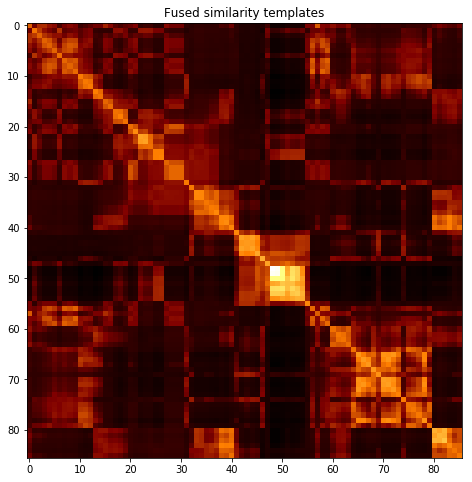

subject 30; gesture 1_1_1


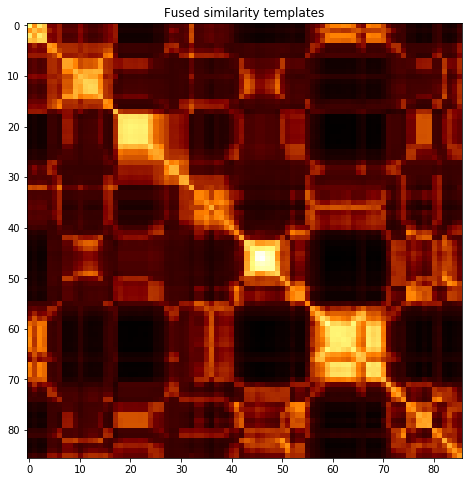

subject 30; gesture 1_0_1


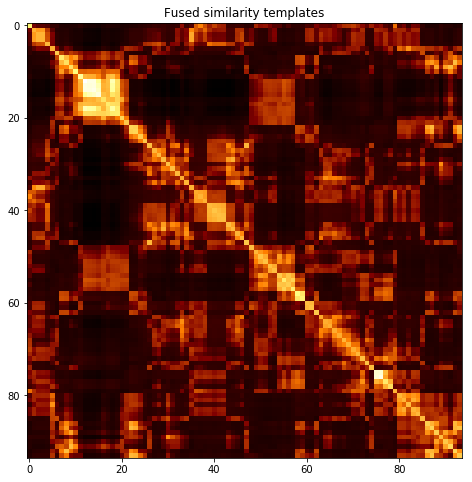

subject 30; gesture 1_0_2


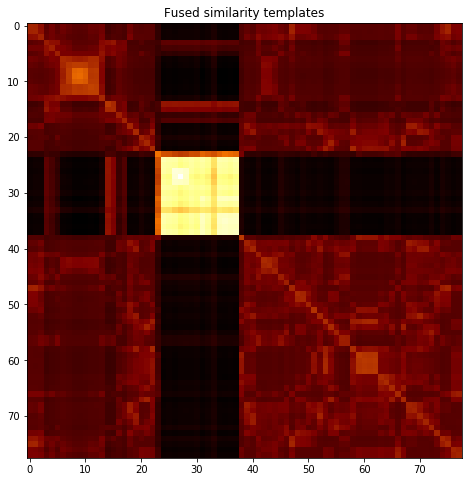

subject 06; gesture 1_1_2


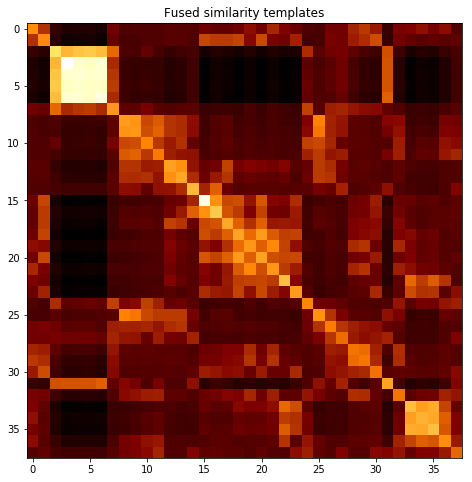

subject 06; gesture 1_1_1


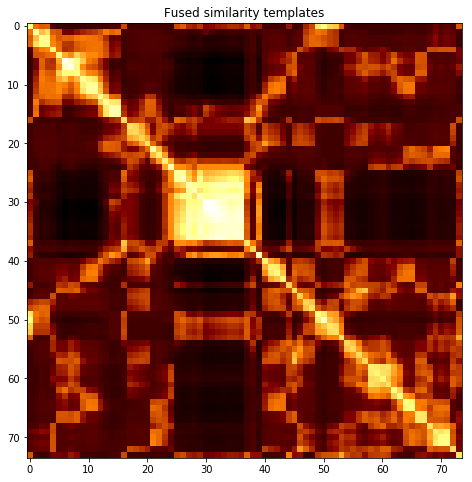

subject 06; gesture 1_0_1


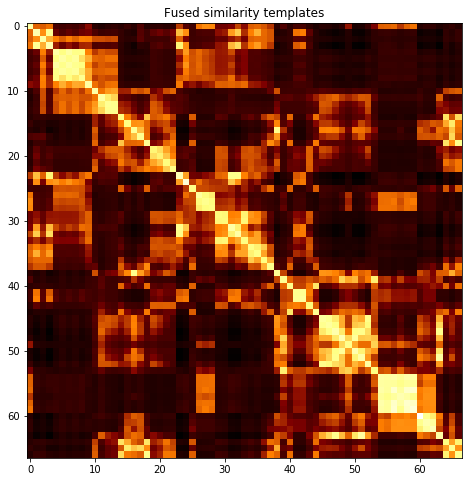

subject 06; gesture 1_0_2


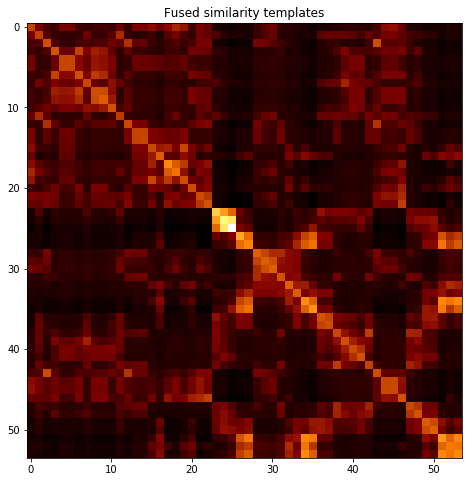

subject 09; gesture 1_1_2


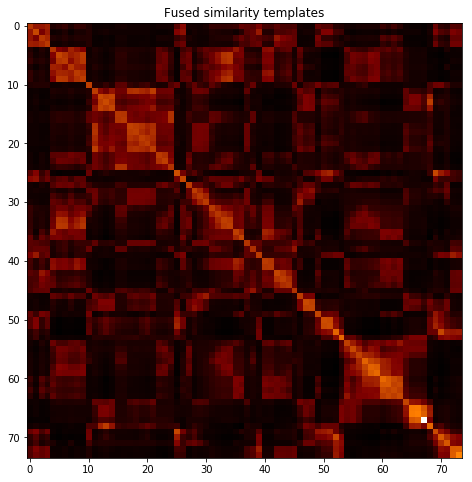

subject 09; gesture 1_1_1


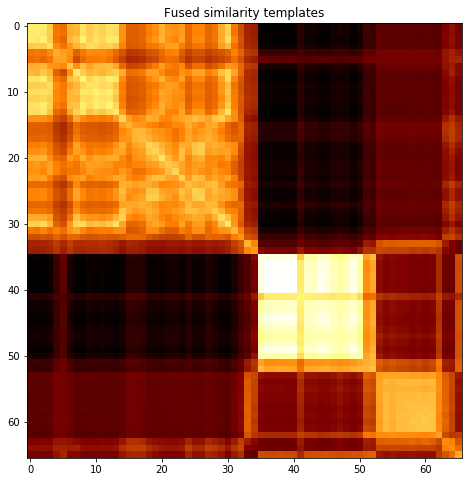

subject 09; gesture 1_0_1


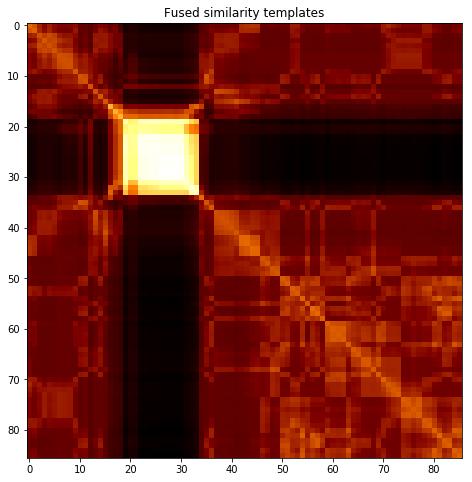

subject 09; gesture 1_0_2


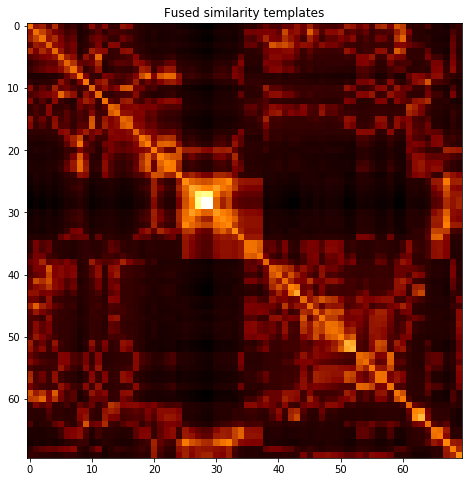

subject 03; gesture 1_1_2


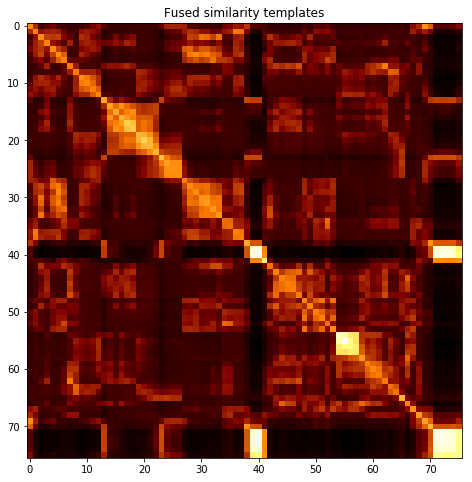

subject 03; gesture 1_1_1


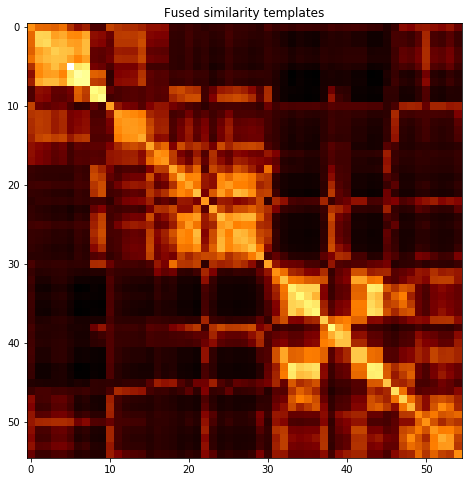

subject 03; gesture 1_0_1


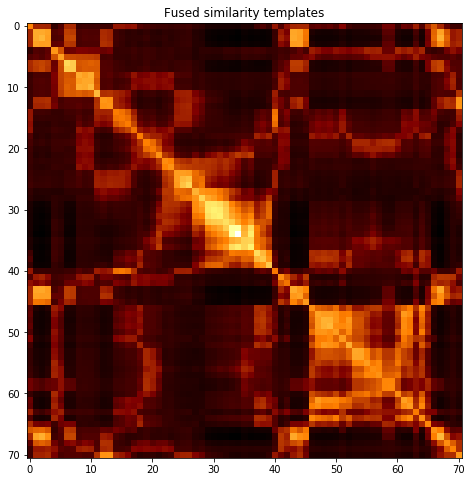

subject 03; gesture 1_0_2


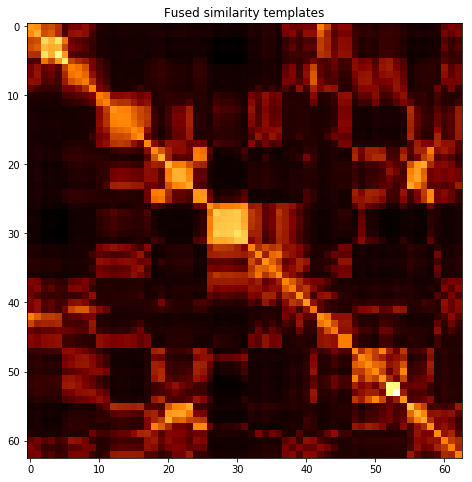

subject 05; gesture 1_1_2


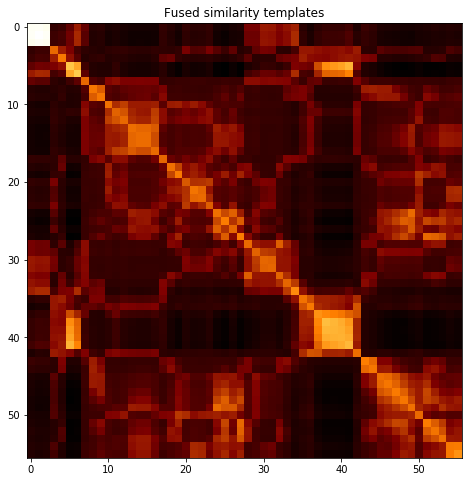

subject 05; gesture 1_1_1


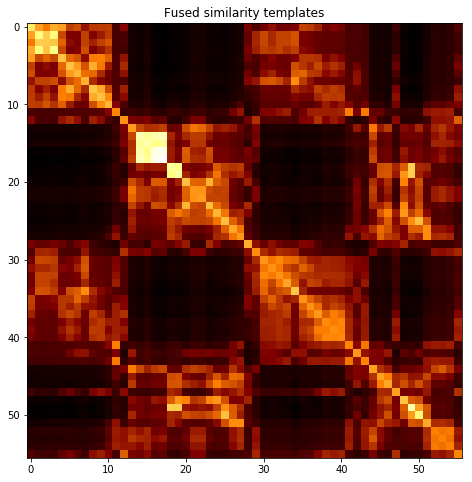

subject 05; gesture 1_0_1


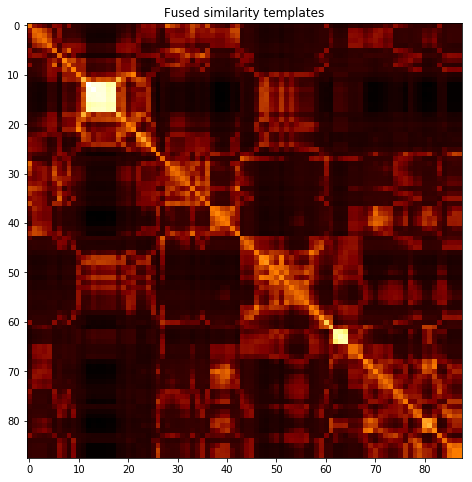

subject 05; gesture 1_0_2


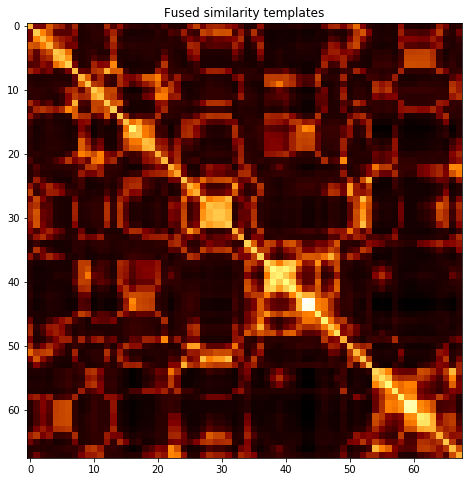

subject 21; gesture 1_1_2


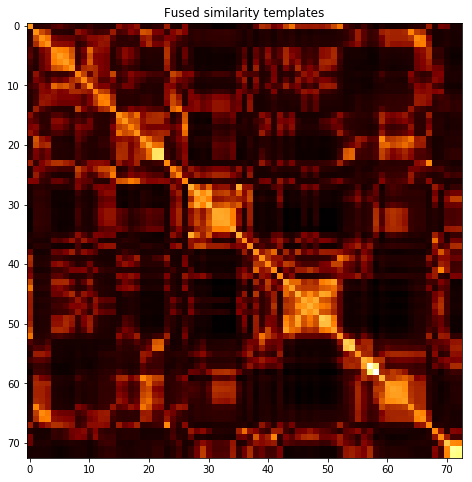

subject 21; gesture 1_1_1


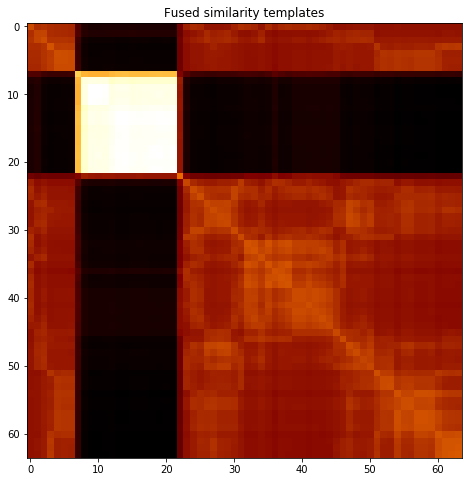

subject 21; gesture 1_0_1


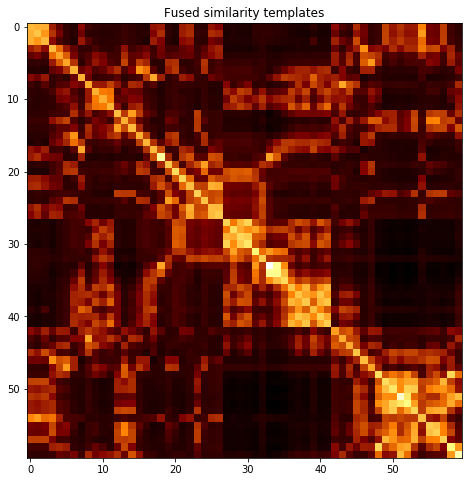

subject 21; gesture 1_0_2


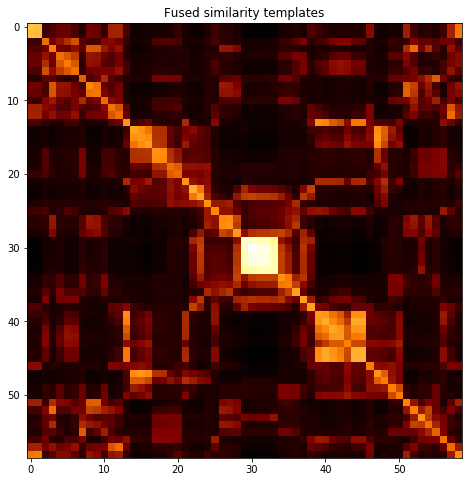

subject 17; gesture 1_1_2


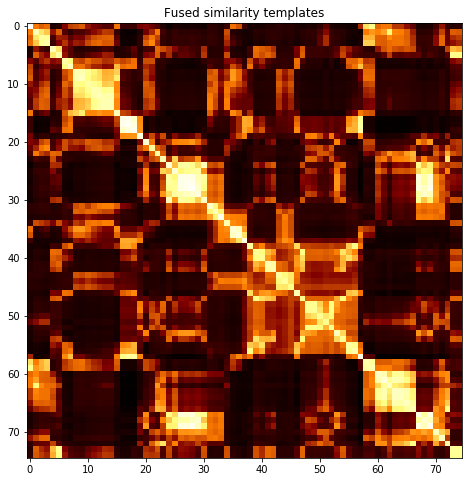

subject 17; gesture 1_1_1


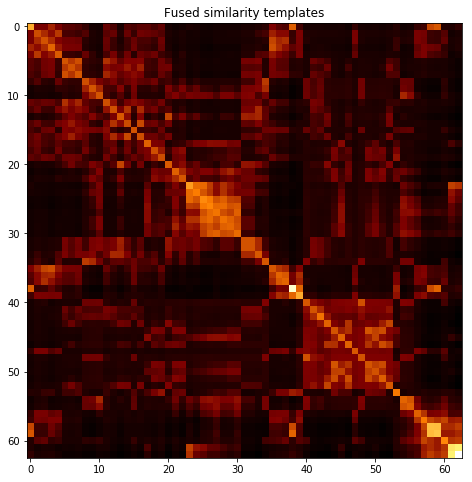

subject 17; gesture 1_0_1


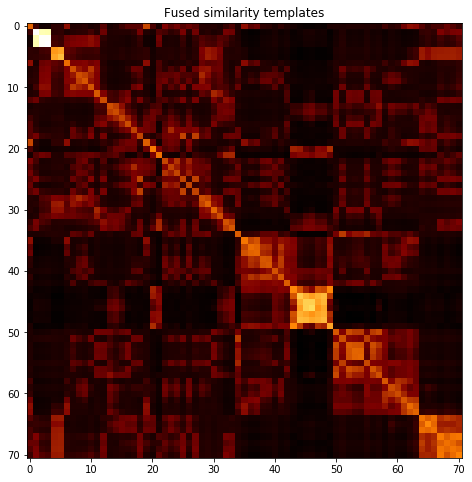

subject 17; gesture 1_0_2


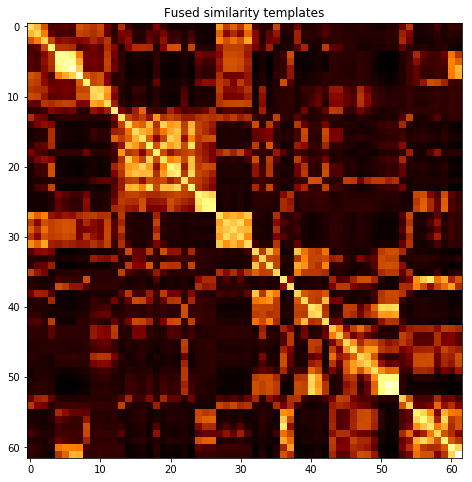

subject 01; gesture 1_1_2


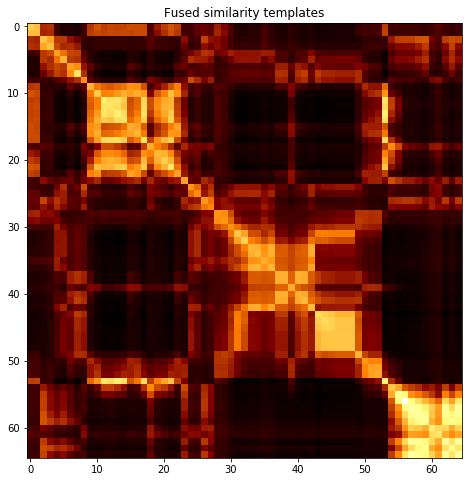

subject 01; gesture 1_1_1


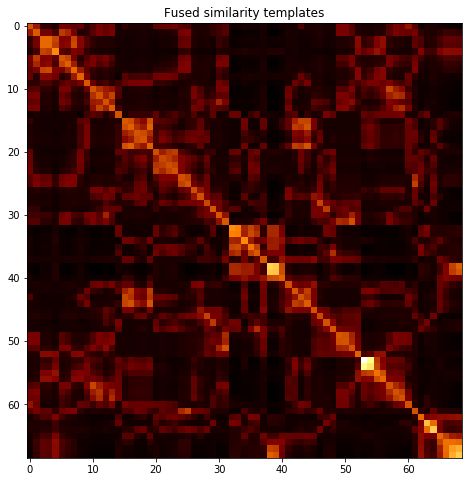

subject 01; gesture 1_0_1


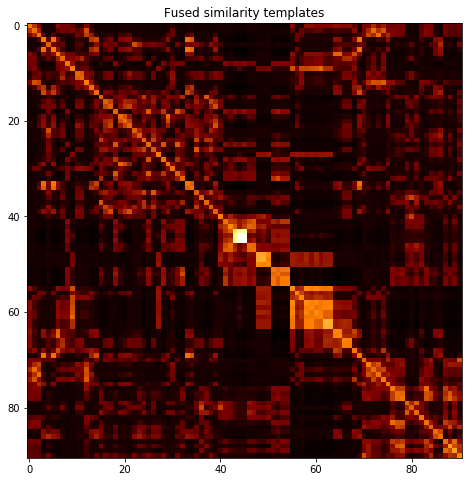

subject 01; gesture 1_0_2


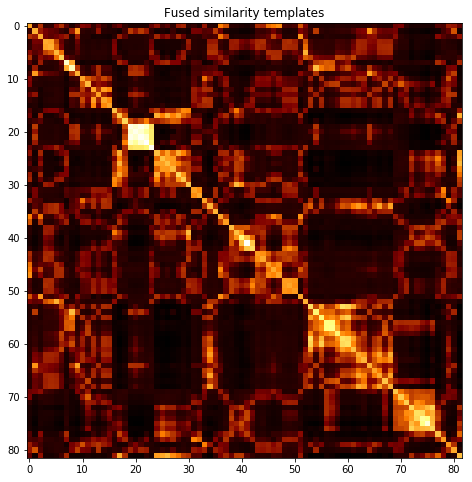

subject 16; gesture 1_1_2


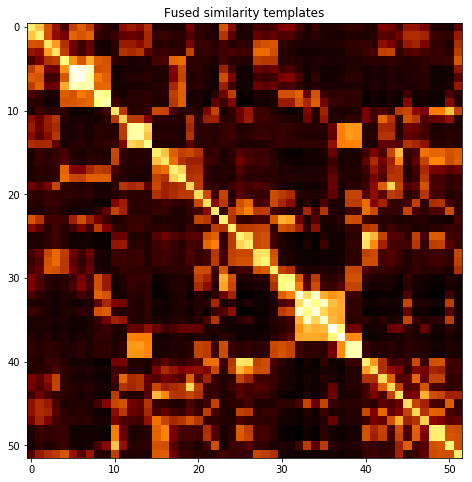

subject 16; gesture 1_1_1


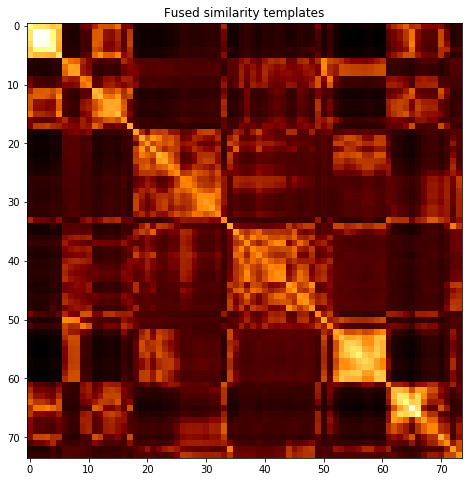

subject 16; gesture 1_0_1


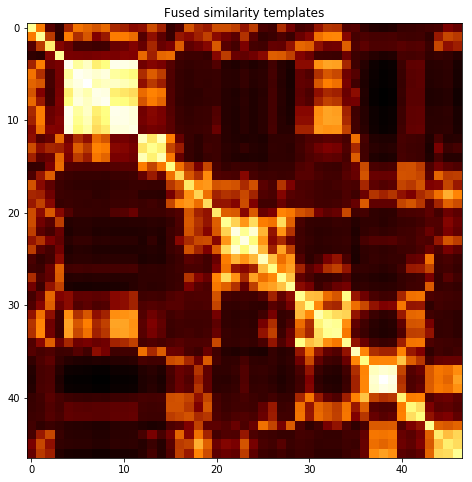

subject 16; gesture 1_0_2


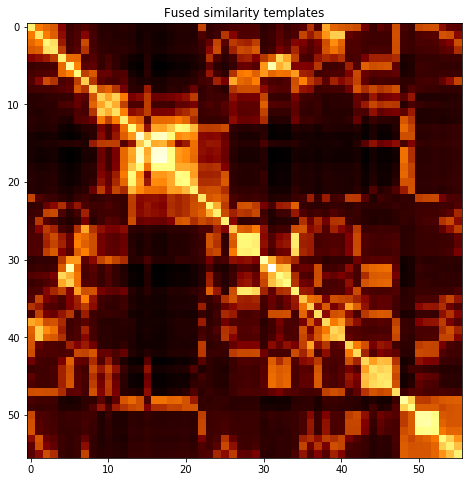

subject 26; gesture 1_1_2


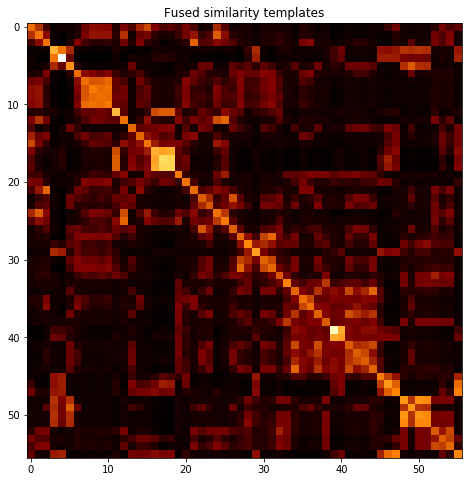

subject 26; gesture 1_1_1


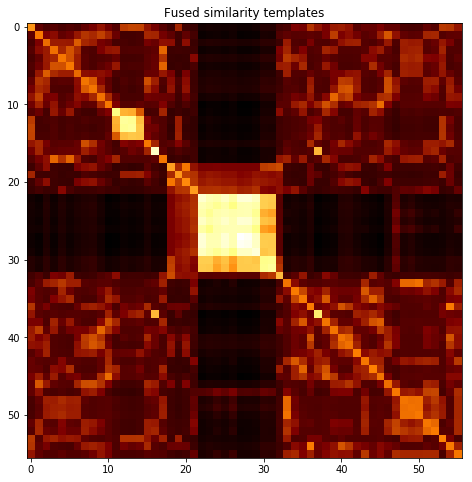

subject 26; gesture 1_0_1


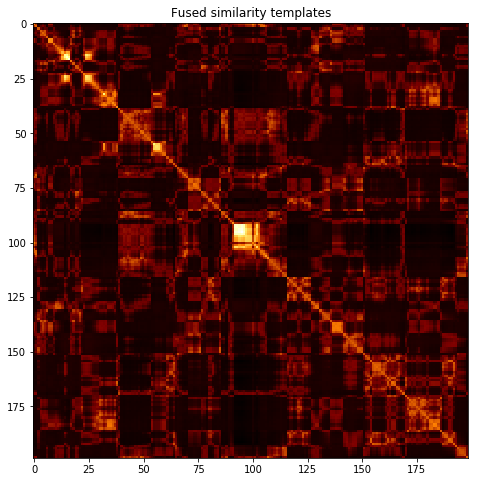

subject 26; gesture 1_0_2


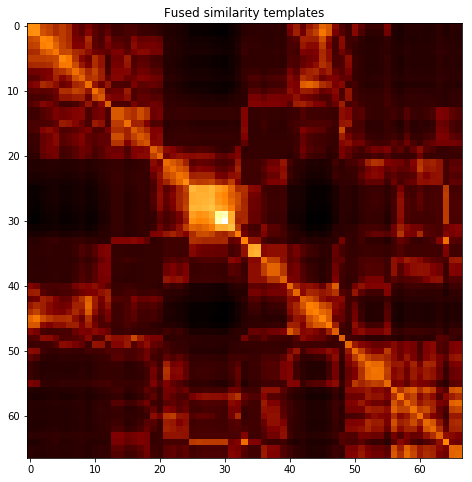

subject 32; gesture 1_1_2


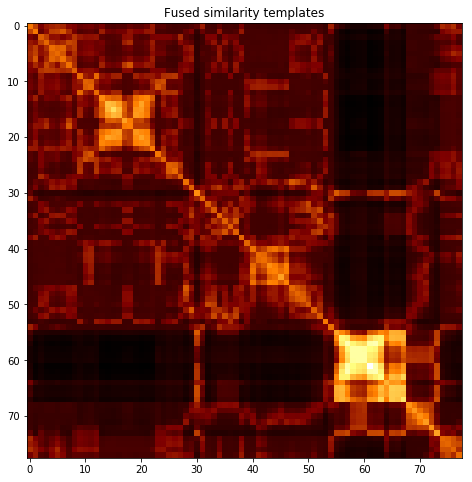

subject 32; gesture 1_1_1


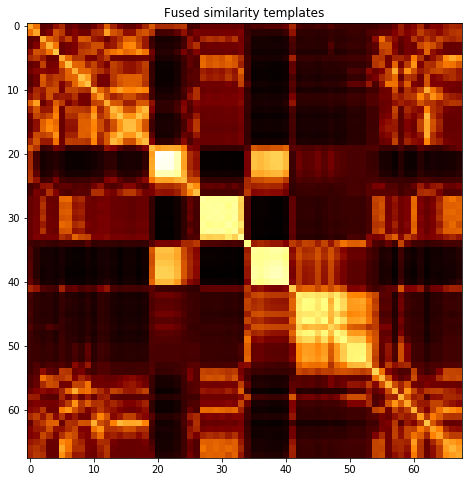

subject 32; gesture 1_0_1


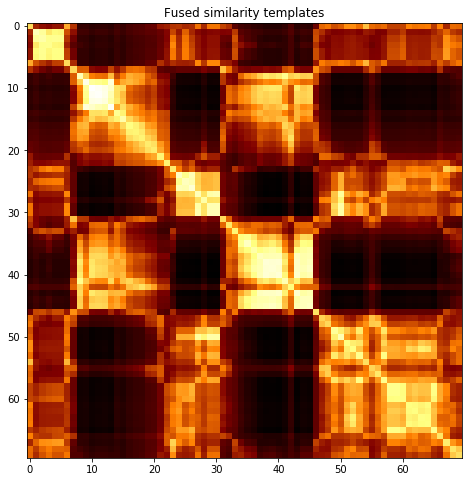

subject 32; gesture 1_0_2


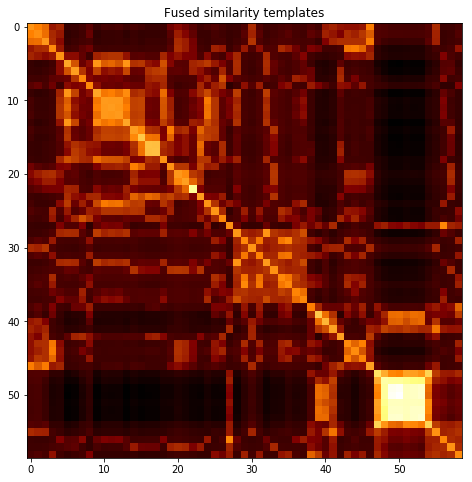

subject 04; gesture 1_1_2


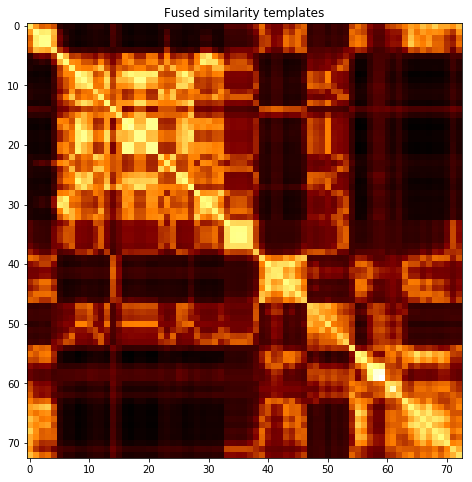

subject 04; gesture 1_1_1


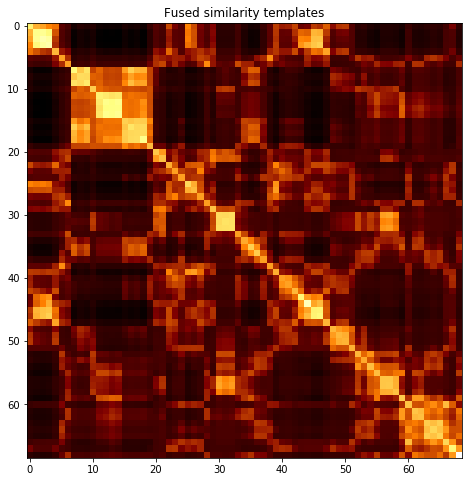

subject 04; gesture 1_0_1


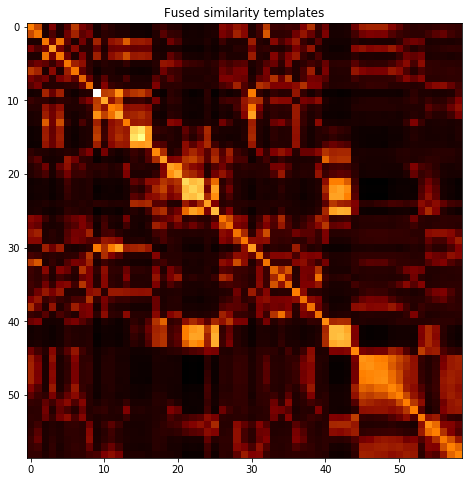

subject 04; gesture 1_0_2


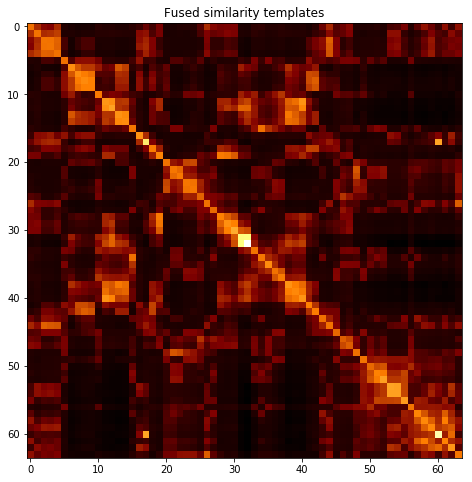

subject 08; gesture 1_1_2


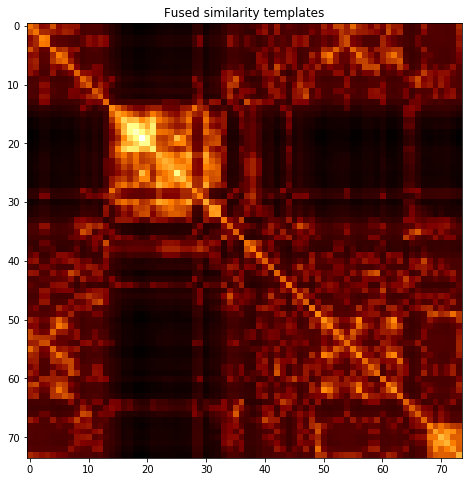

subject 08; gesture 1_1_1


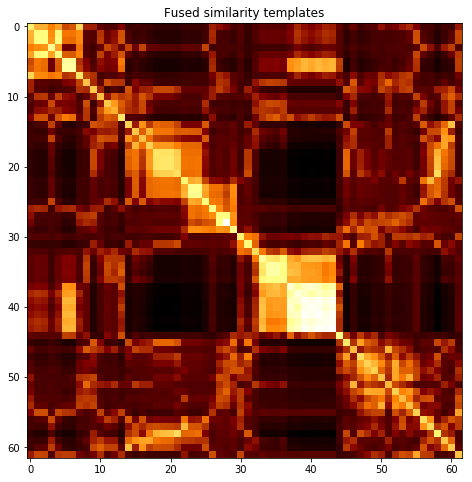

subject 08; gesture 1_0_1


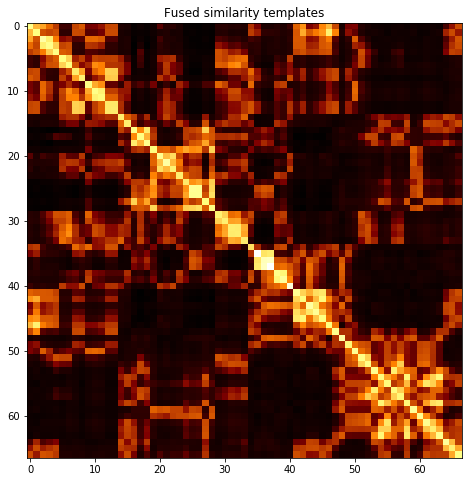

subject 08; gesture 1_0_2


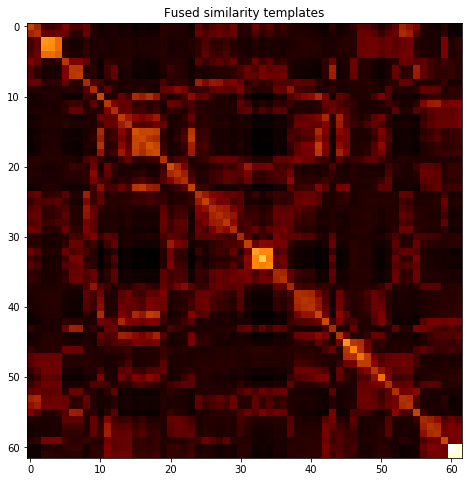

subject 27; gesture 1_1_2


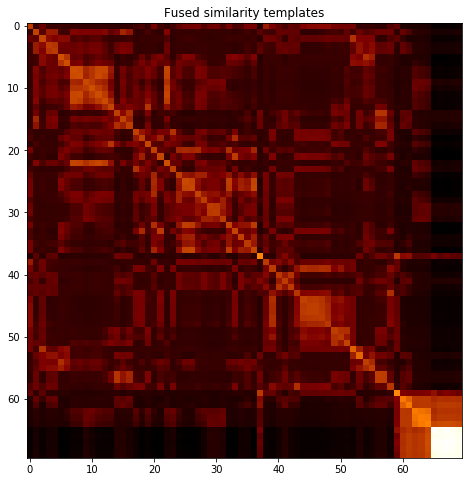

subject 27; gesture 1_1_1


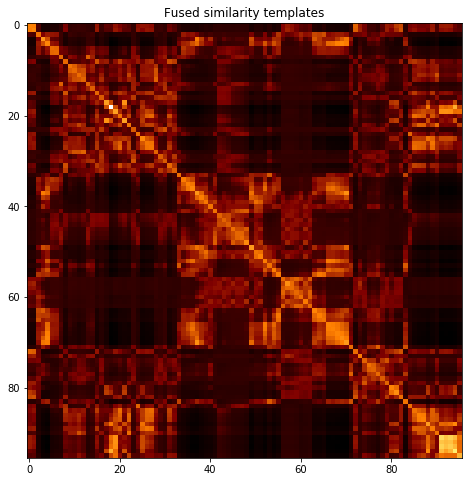

subject 27; gesture 1_0_1


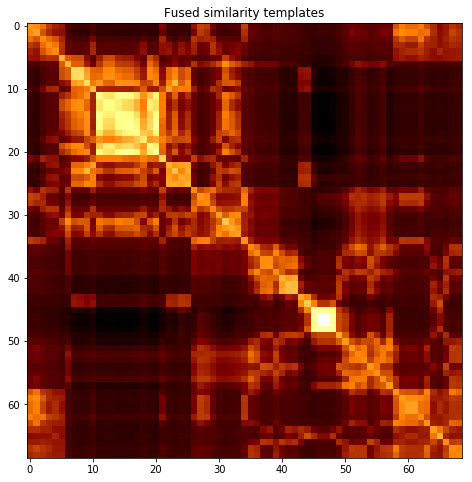

subject 27; gesture 1_0_2


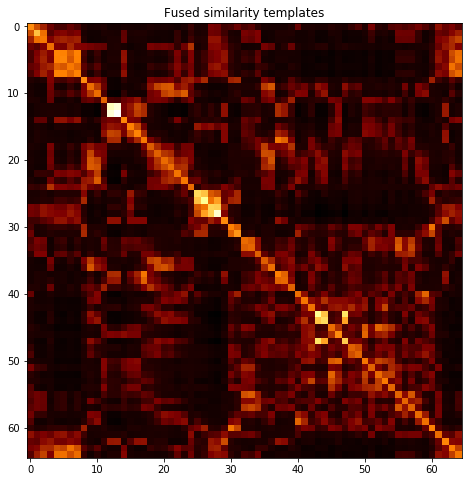

subject 14; gesture 1_1_2


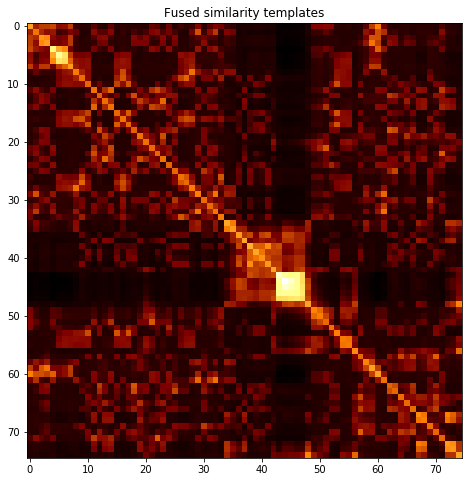

subject 14; gesture 1_1_1


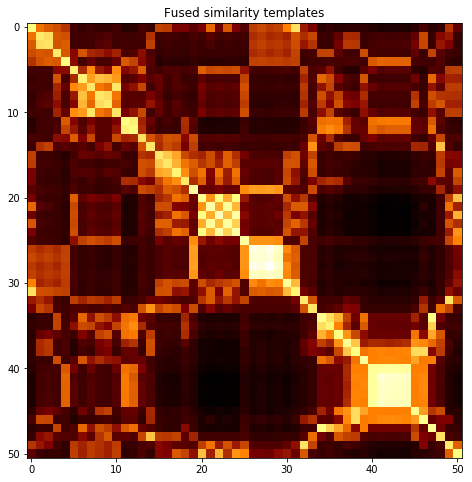

subject 14; gesture 1_0_1


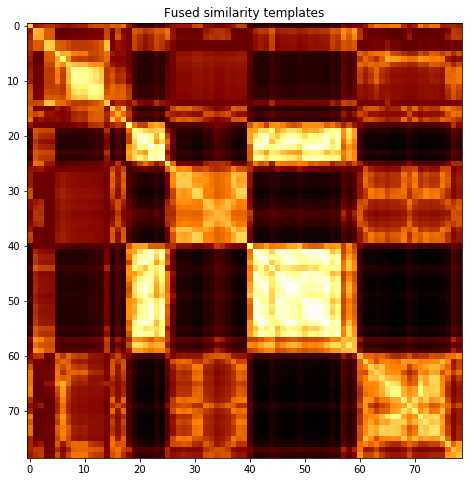

subject 14; gesture 1_0_2


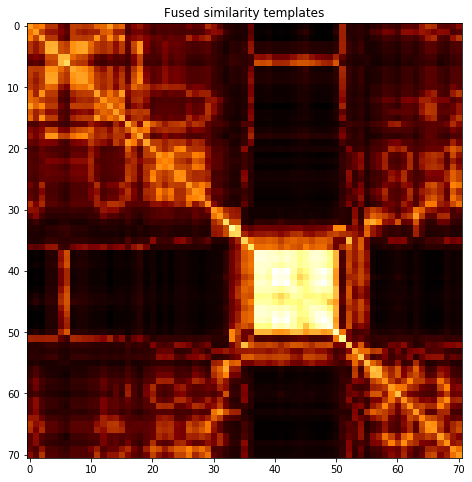

subject 23; gesture 1_1_2


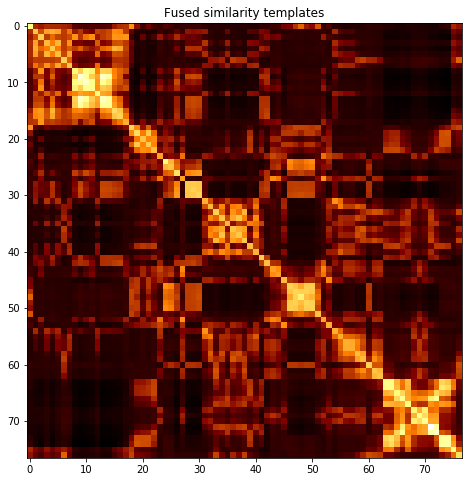

subject 23; gesture 1_1_1


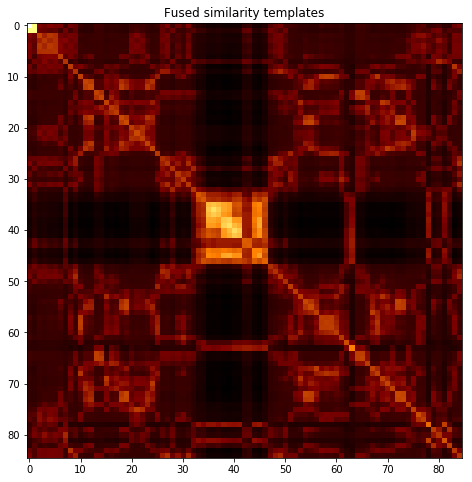

subject 23; gesture 1_0_1


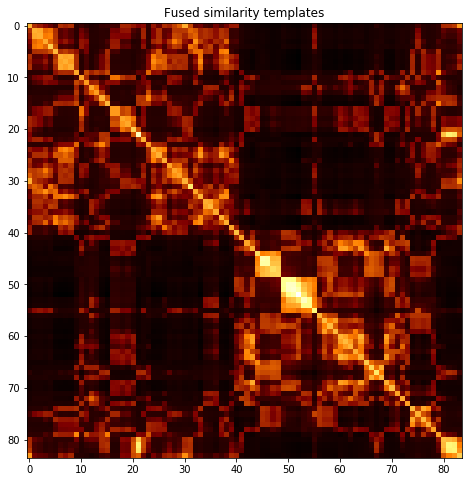

subject 23; gesture 1_0_2


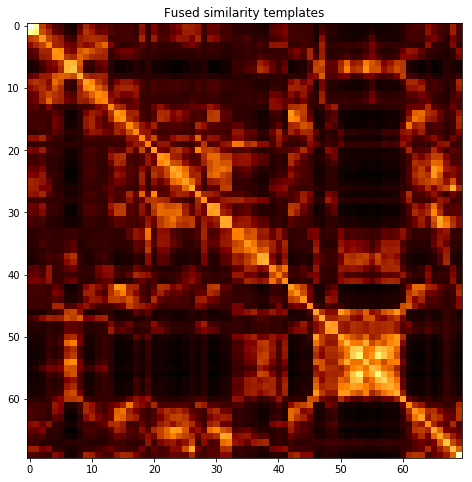

subject 25; gesture 1_1_2


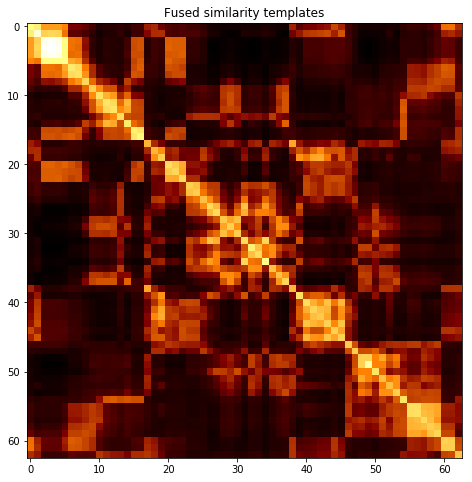

subject 25; gesture 1_1_1


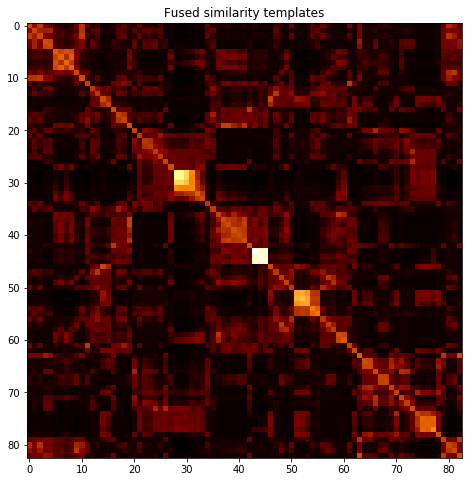

subject 25; gesture 1_0_1


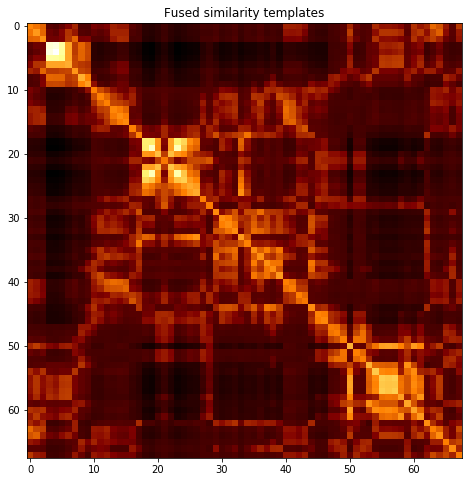

subject 25; gesture 1_0_2


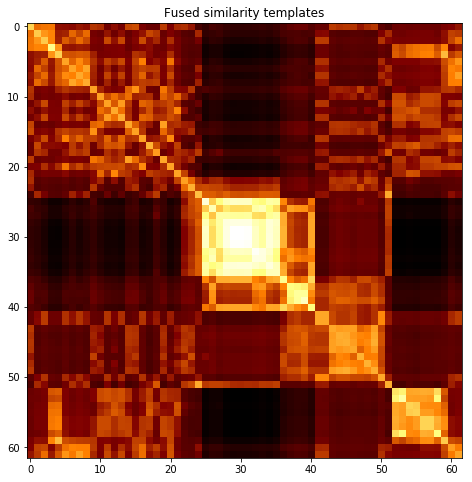

subject 18; gesture 1_1_2


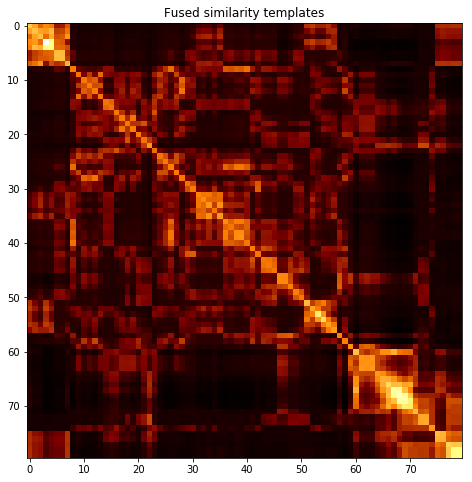

subject 18; gesture 1_1_1


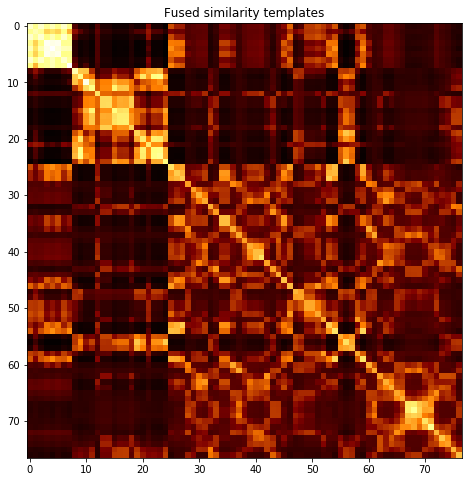

subject 18; gesture 1_0_1


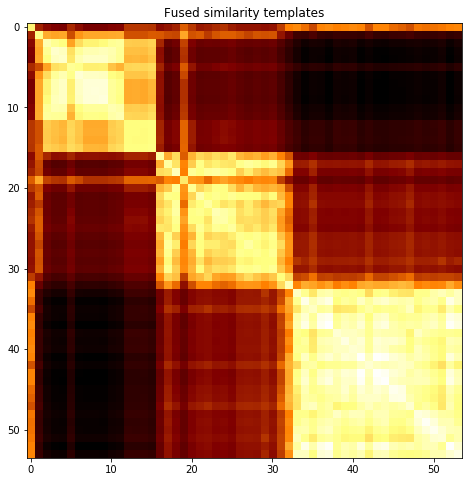

subject 18; gesture 1_0_2


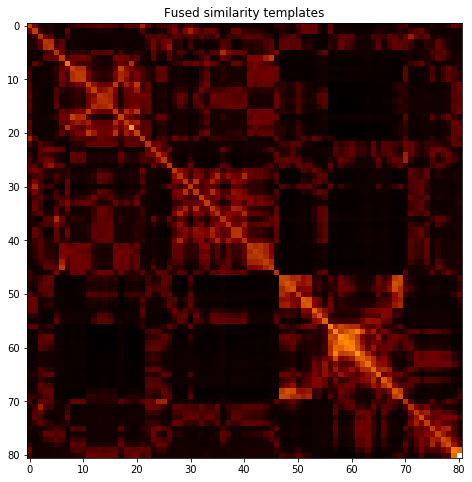

subject 29; gesture 1_1_2


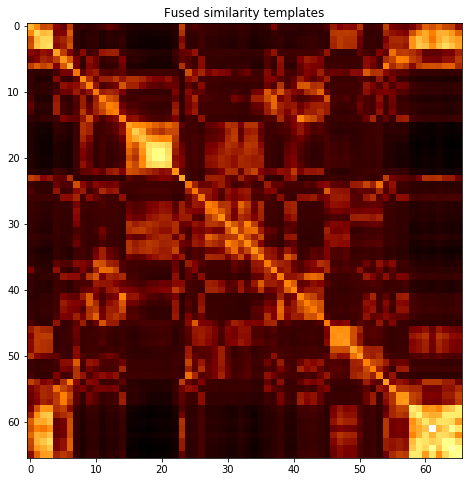

subject 29; gesture 1_1_1


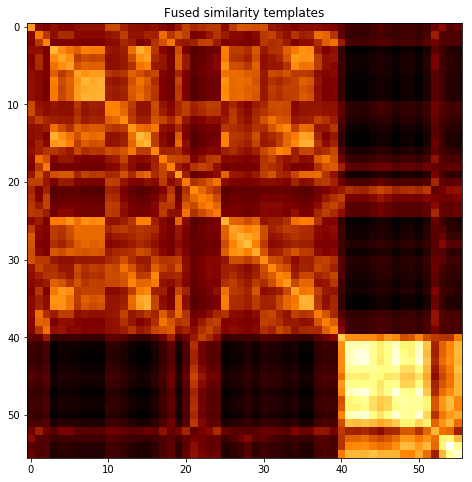

subject 29; gesture 1_0_1


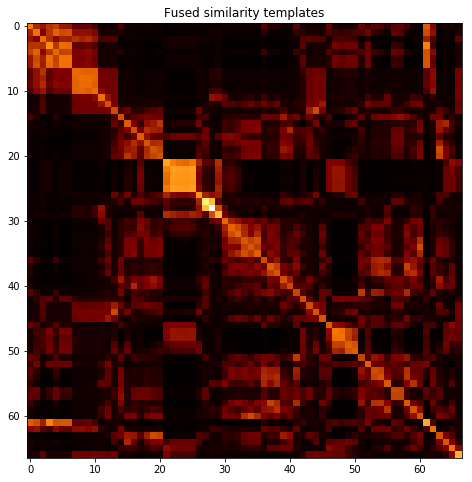

subject 29; gesture 1_0_2


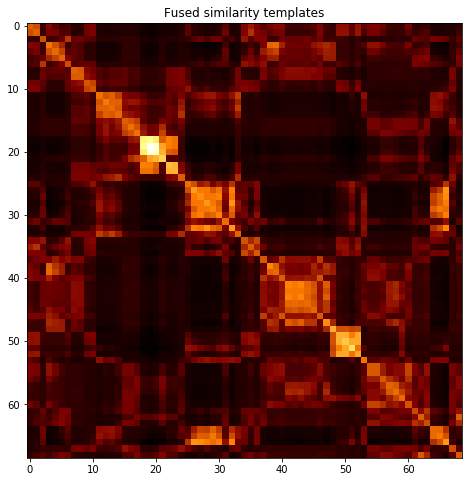

subject 15; gesture 1_1_2


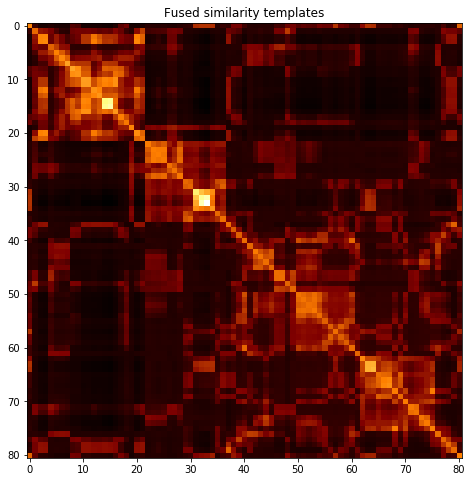

subject 15; gesture 1_1_1


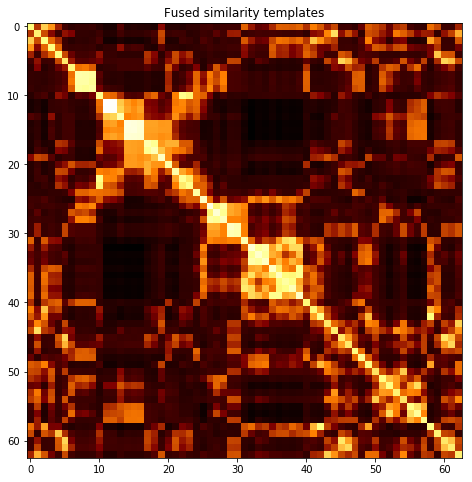

subject 15; gesture 1_0_1


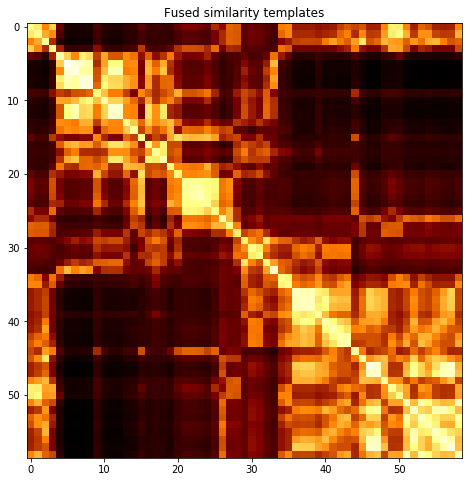

subject 15; gesture 1_0_2


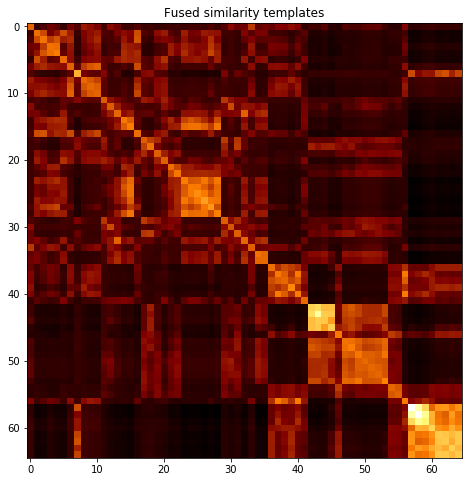

subject 28; gesture 1_1_2


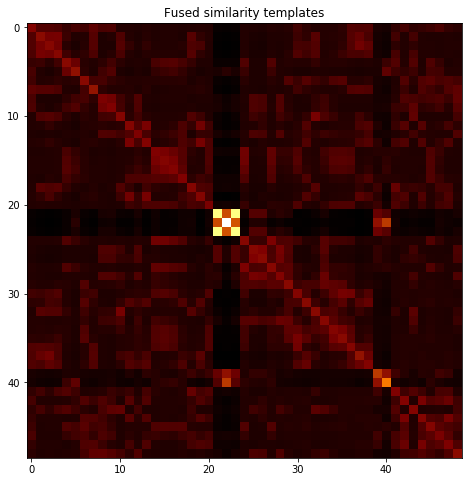

subject 28; gesture 1_1_1


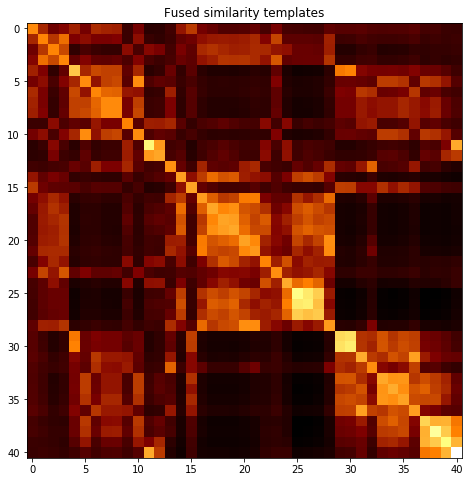

subject 28; gesture 1_0_1


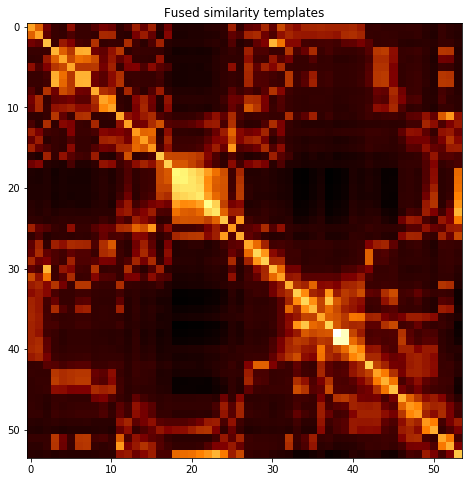

subject 28; gesture 1_0_2


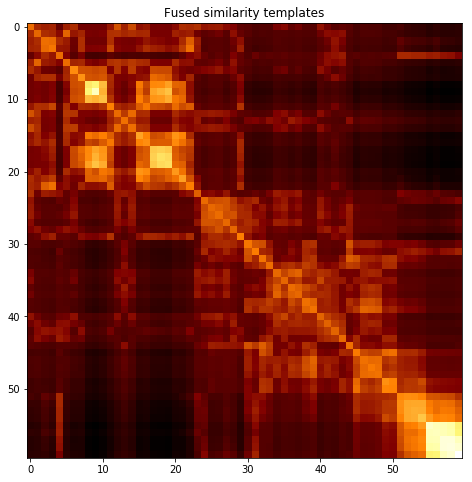

subject 12; gesture 1_1_2


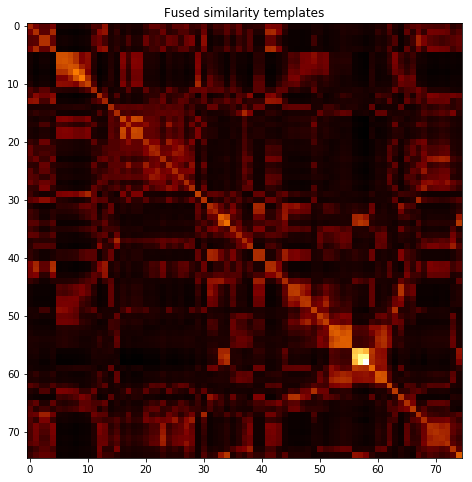

subject 12; gesture 1_1_1


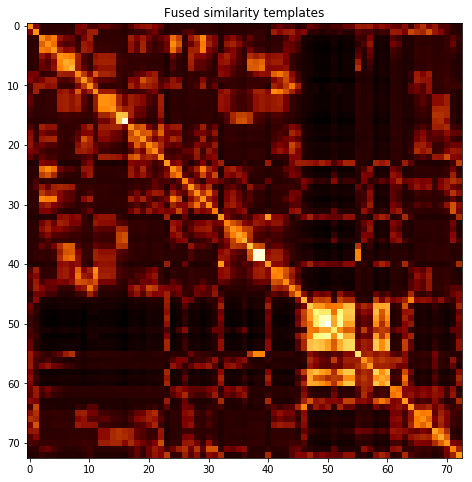

subject 12; gesture 1_0_1


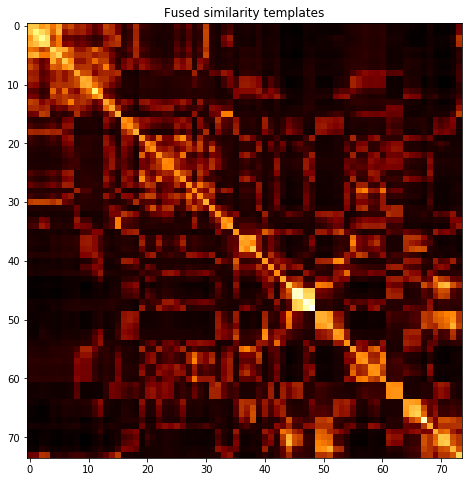

subject 12; gesture 1_0_2


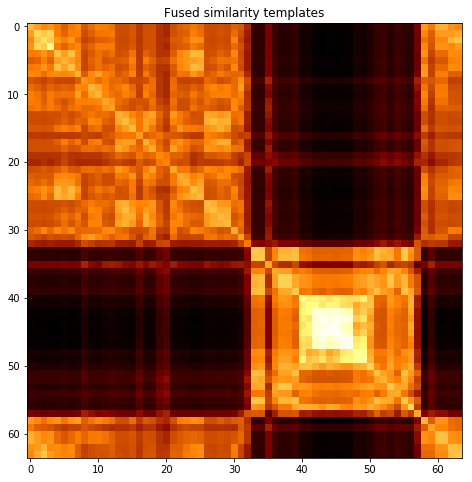

subject 19; gesture 1_1_2


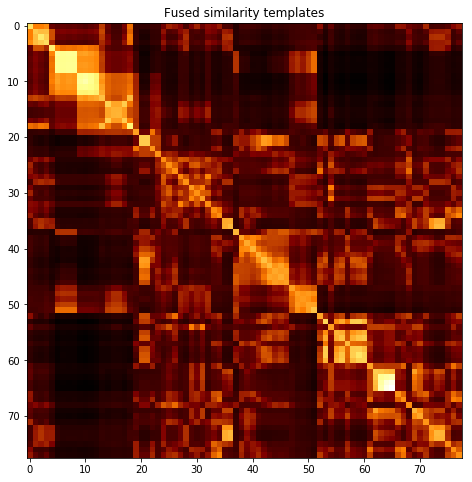

subject 19; gesture 1_1_1


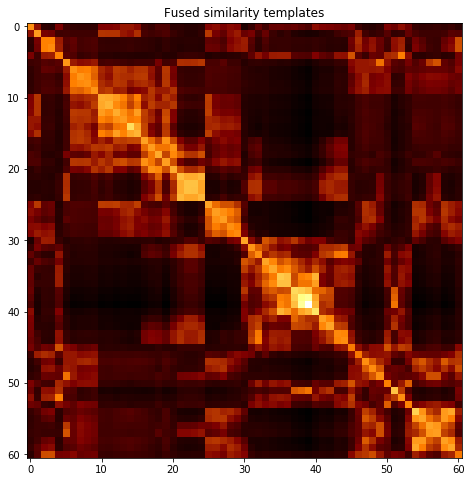

subject 19; gesture 1_0_1


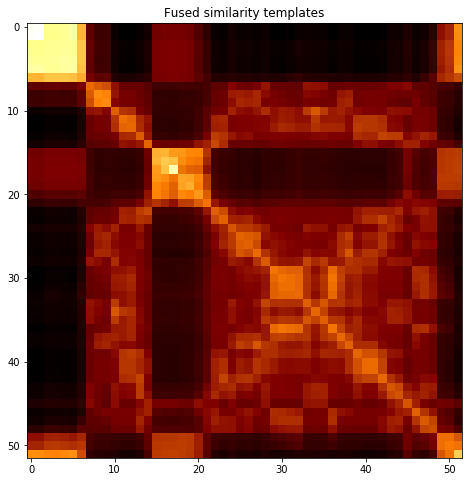

subject 19; gesture 1_0_2


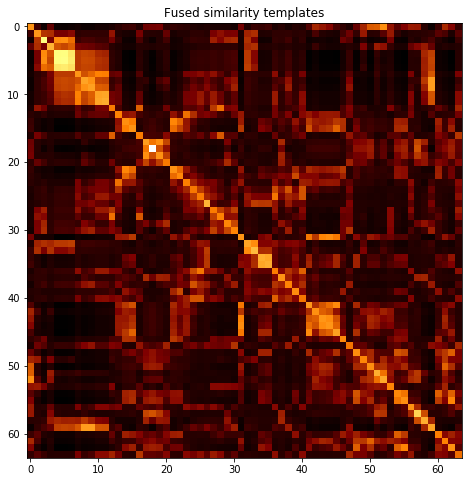

subject 07; gesture 1_1_2


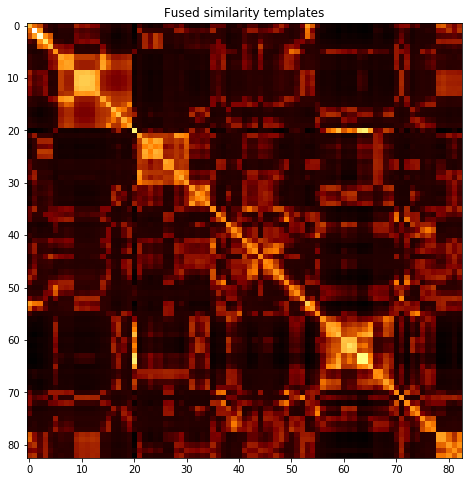

subject 07; gesture 1_1_1


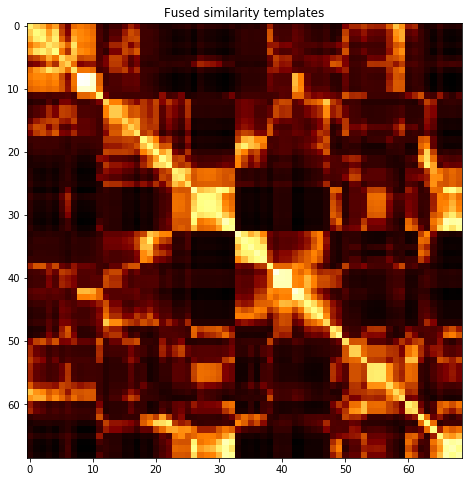

subject 07; gesture 1_0_1


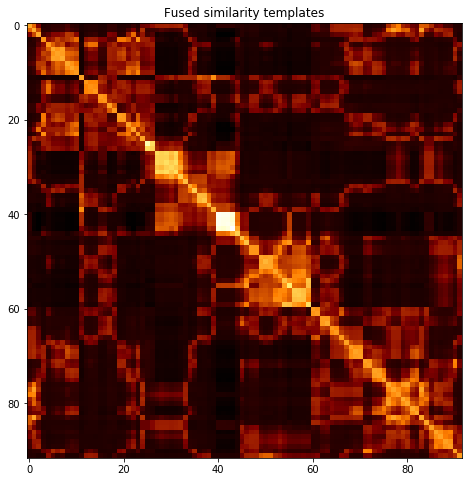

subject 07; gesture 1_0_2


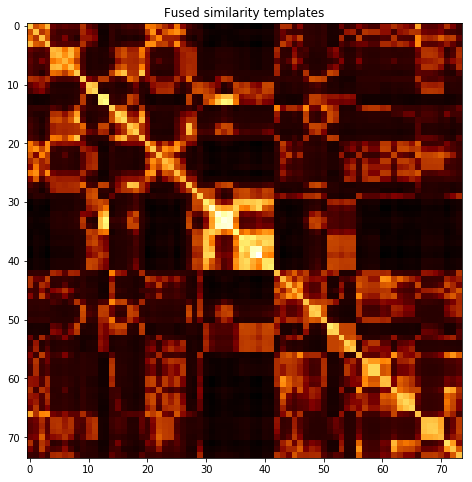

subject 20; gesture 1_1_2


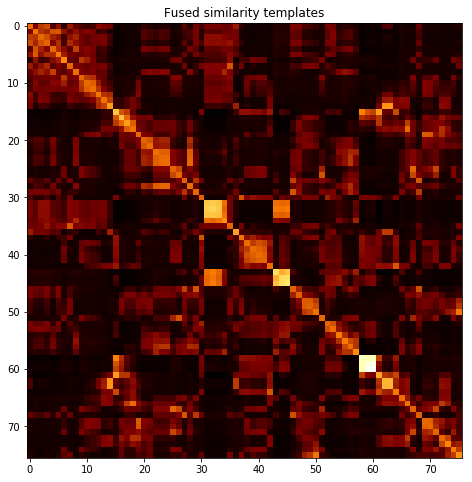

subject 20; gesture 1_1_1


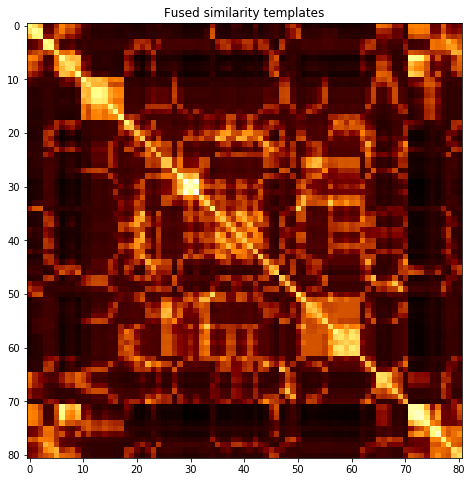

subject 20; gesture 1_0_1


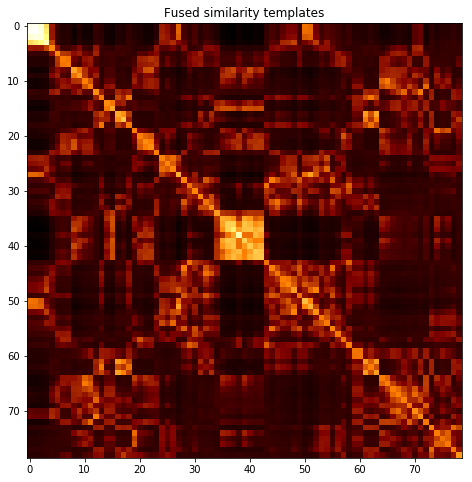

subject 20; gesture 1_0_2


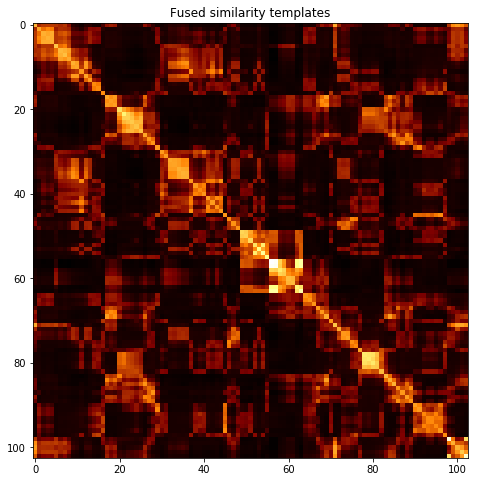

subject 31; gesture 1_1_2


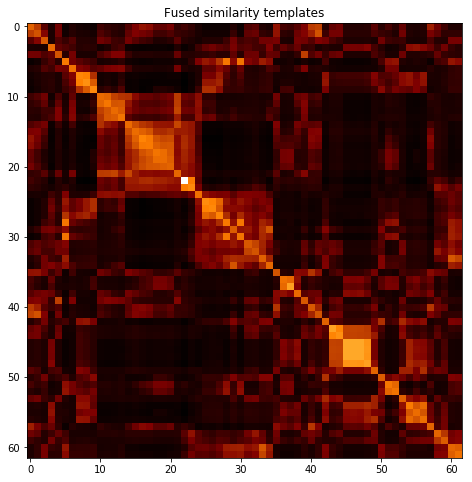

subject 31; gesture 1_1_1


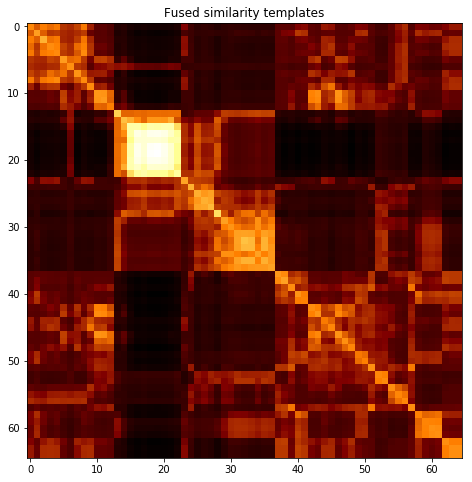

subject 31; gesture 1_0_1


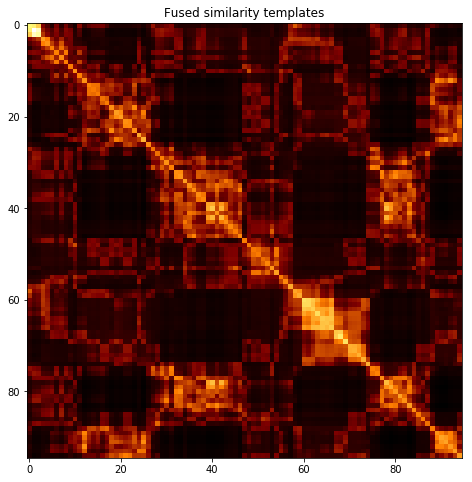

subject 31; gesture 1_0_2


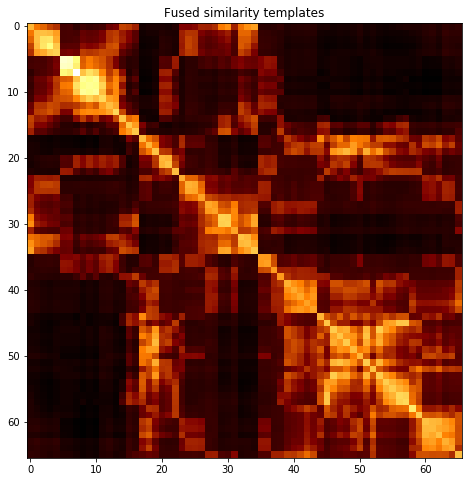

subject 13; gesture 1_1_2


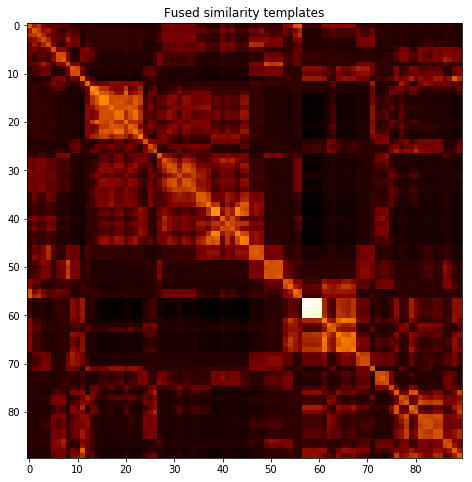

subject 13; gesture 1_1_1


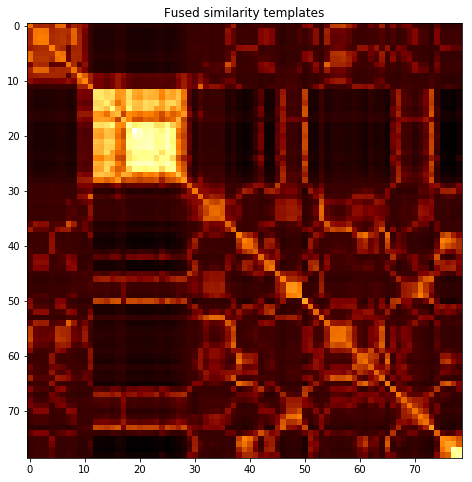

subject 13; gesture 1_0_1


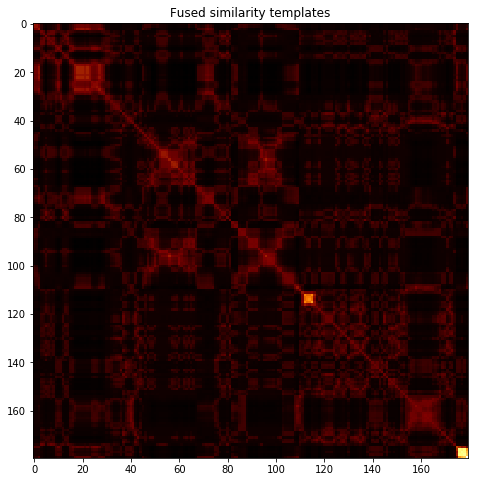

subject 13; gesture 1_0_2


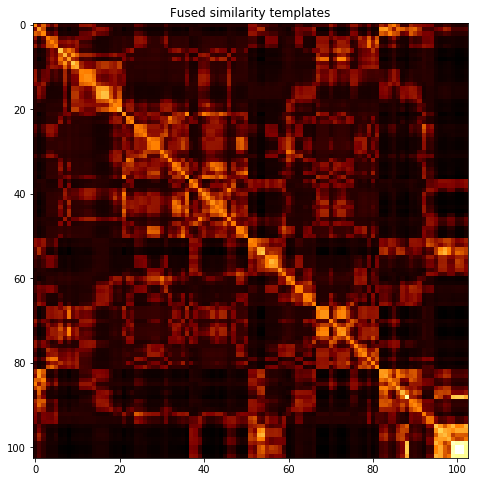

subject 36; gesture 1_1_2


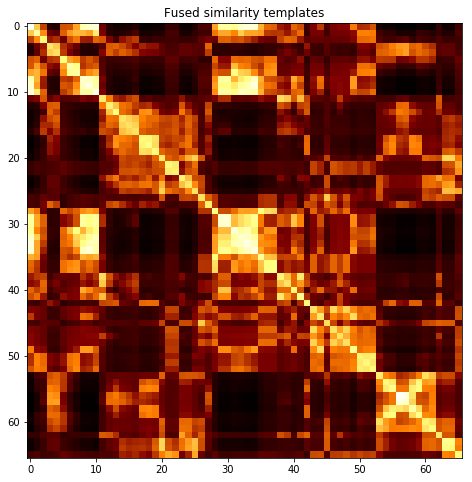

subject 36; gesture 1_1_1


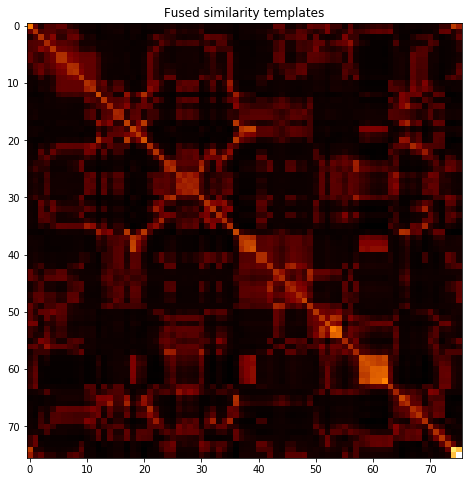

subject 36; gesture 1_0_1


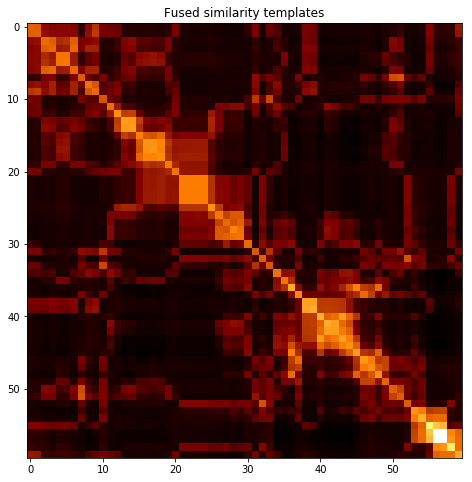

subject 36; gesture 1_0_2


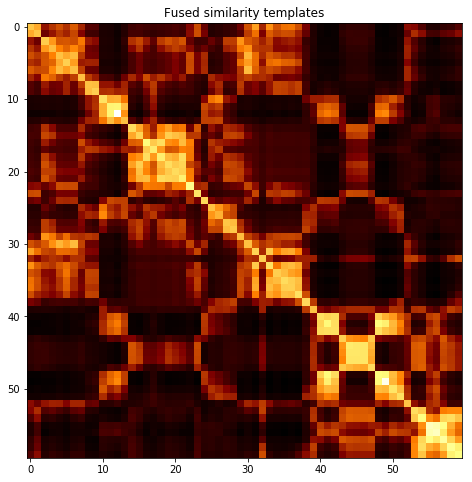

subject 24; gesture 1_1_2


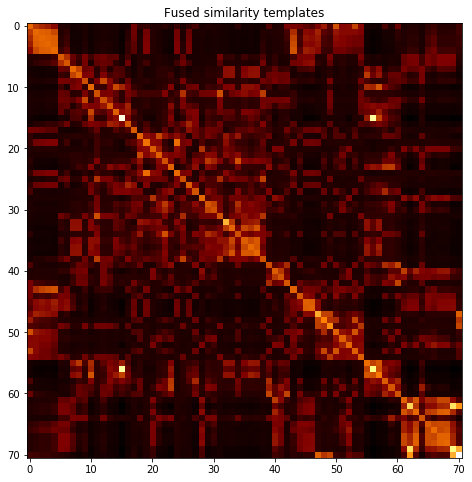

subject 24; gesture 1_1_1


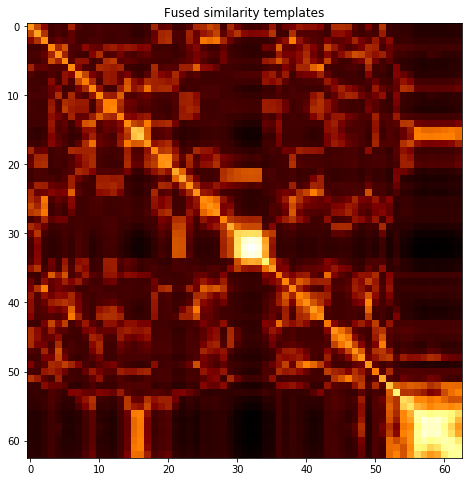

subject 24; gesture 1_0_1


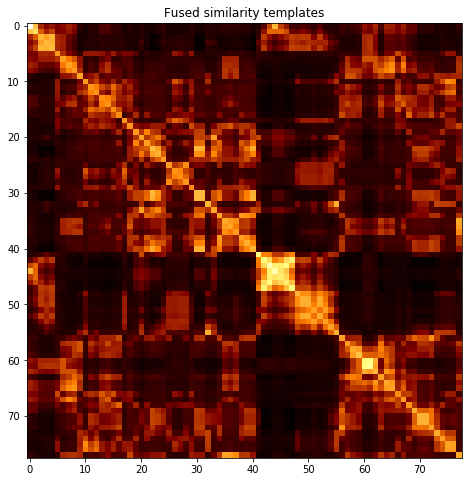

subject 24; gesture 1_0_2


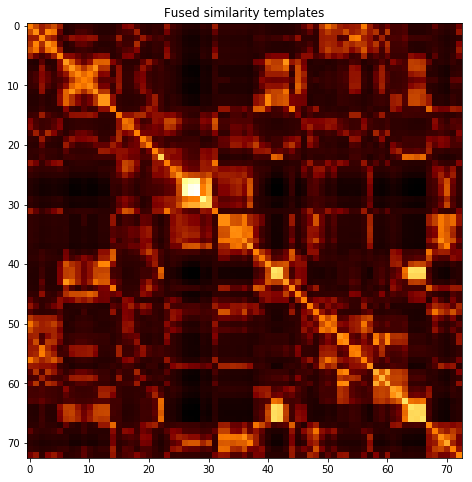

subject 33; gesture 1_1_2


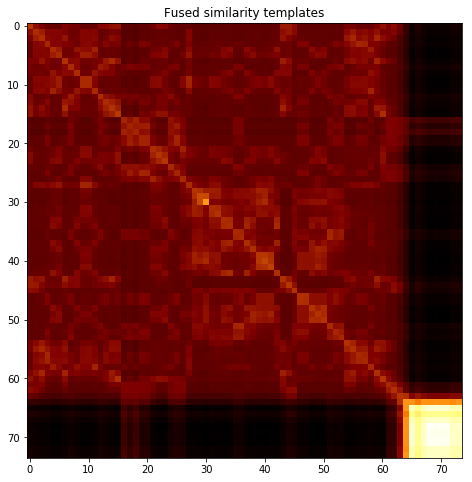

subject 33; gesture 1_1_1


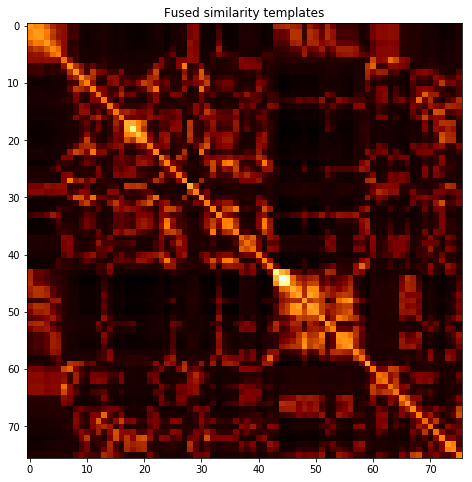

subject 33; gesture 1_0_1


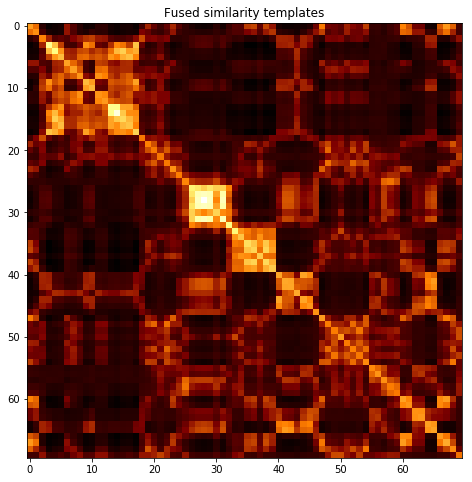

subject 33; gesture 1_0_2


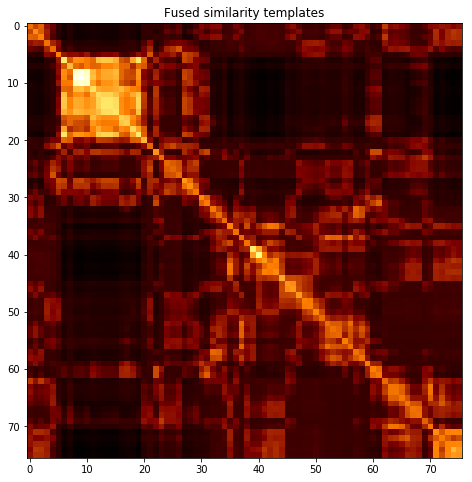

subject 11; gesture 1_1_2


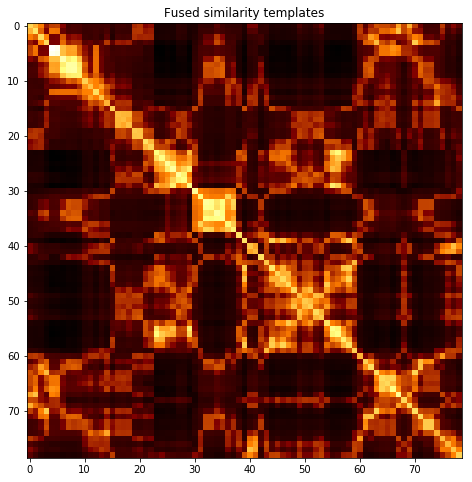

subject 11; gesture 1_1_1


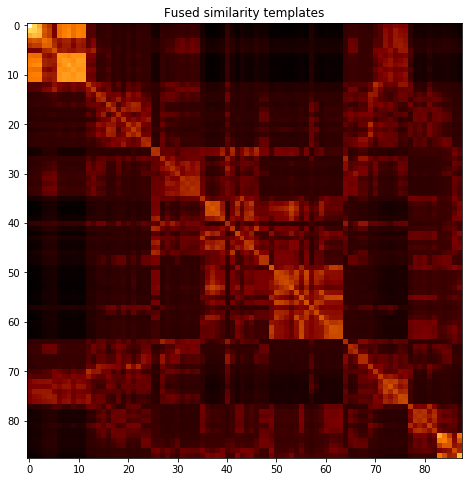

subject 11; gesture 1_0_1


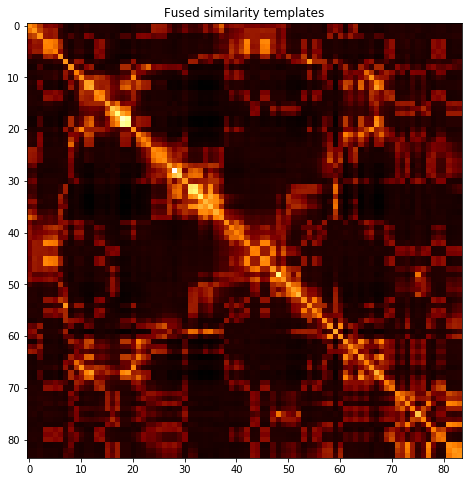

subject 11; gesture 1_0_2


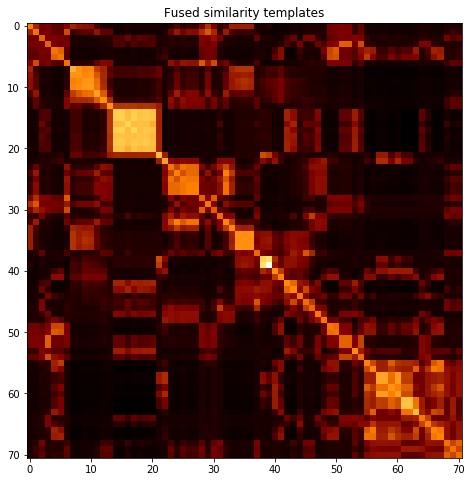

subject 35; gesture 1_1_2


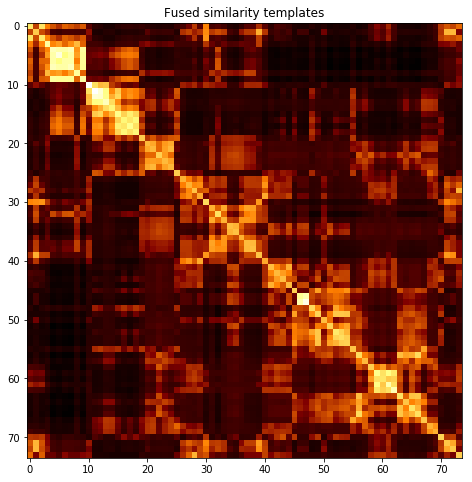

subject 35; gesture 1_1_1


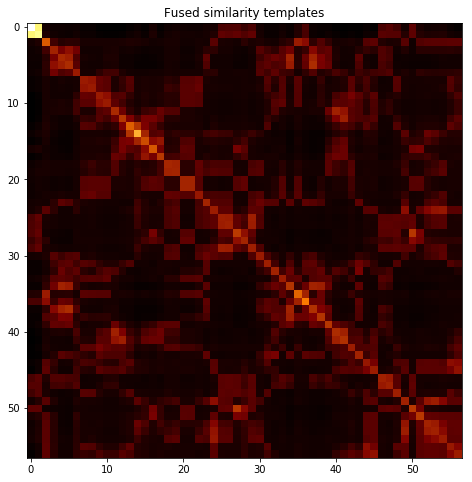

subject 35; gesture 1_0_1


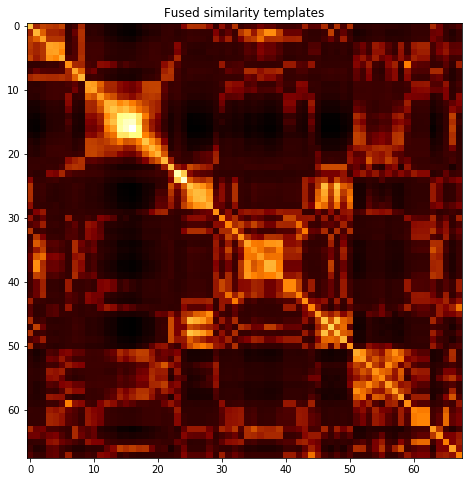

subject 35; gesture 1_0_2


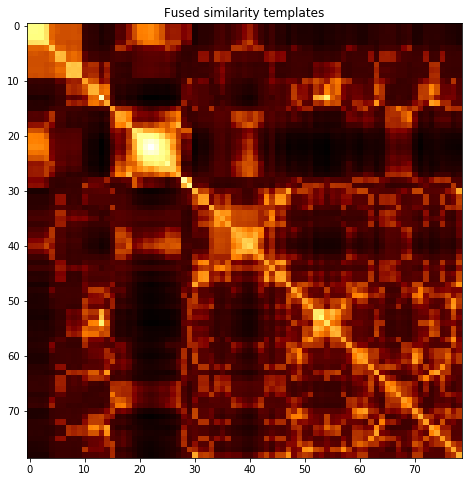

subject 22; gesture 1_1_2


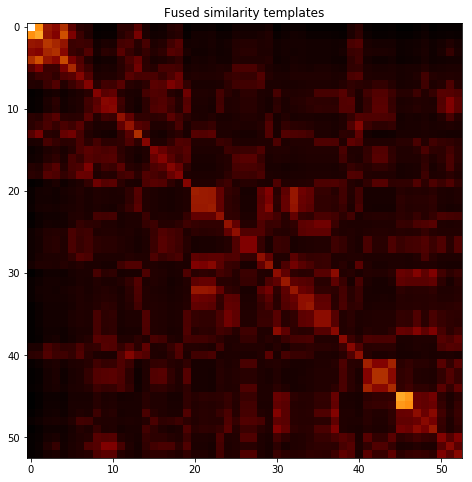

subject 22; gesture 1_1_1


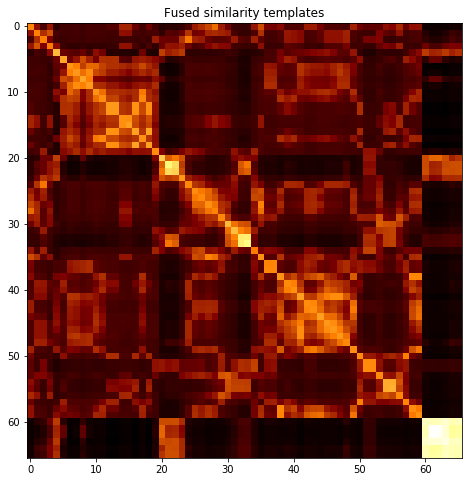

subject 22; gesture 1_0_1


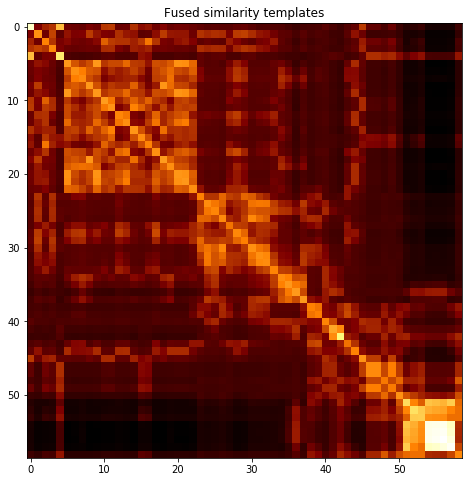

subject 22; gesture 1_0_2


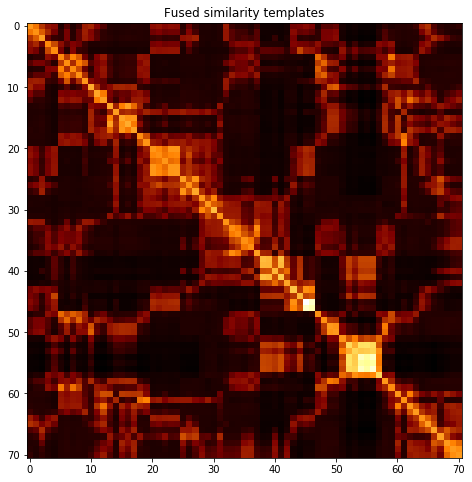

subject 34; gesture 1_1_2


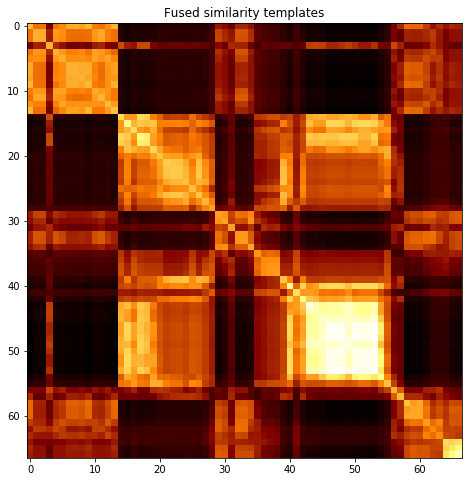

subject 34; gesture 1_1_1


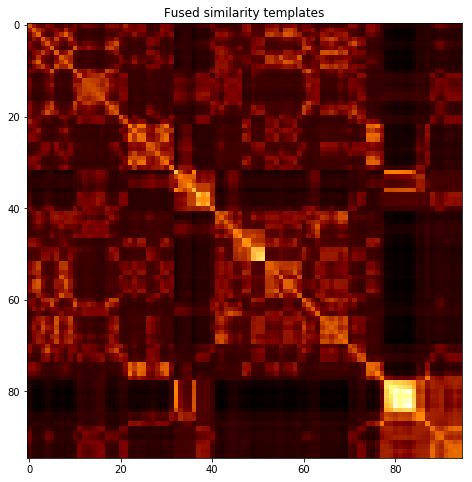

subject 34; gesture 1_0_1


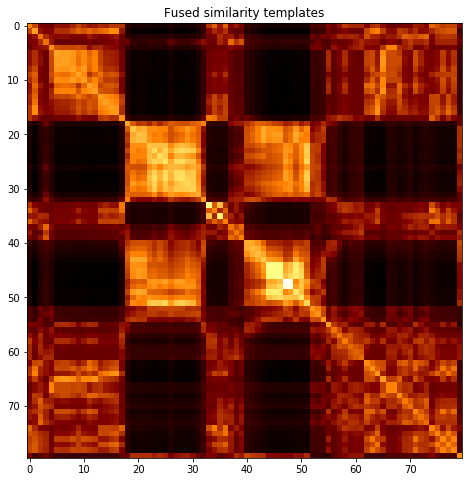

subject 34; gesture 1_0_2


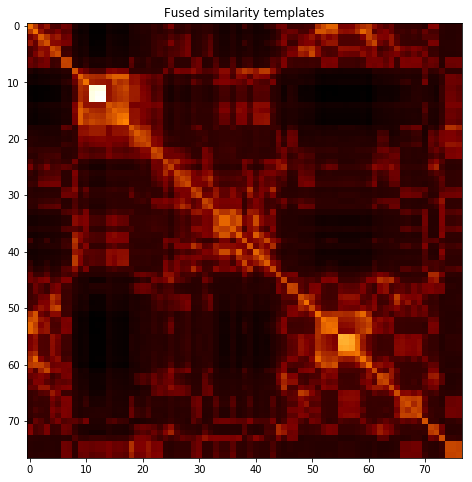

subject 10; gesture 1_1_2


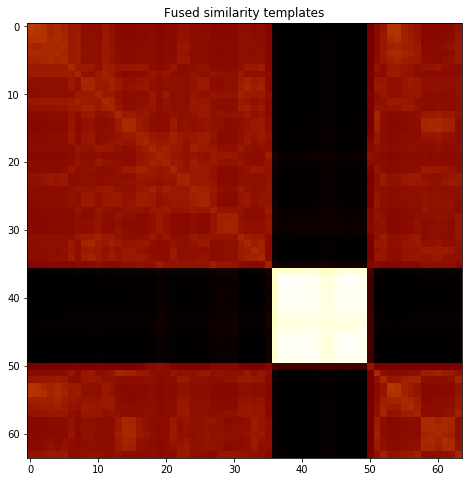

subject 10; gesture 1_1_1


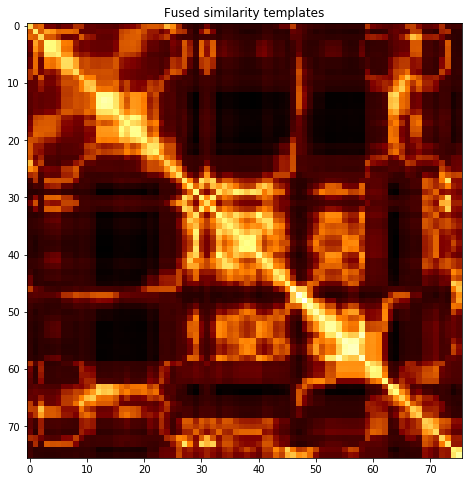

subject 10; gesture 1_0_1


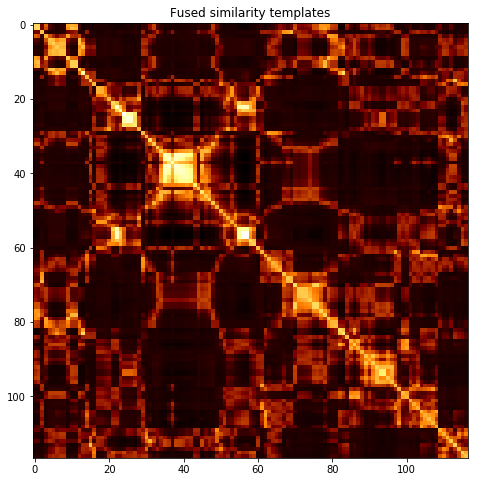

subject 10; gesture 1_0_2


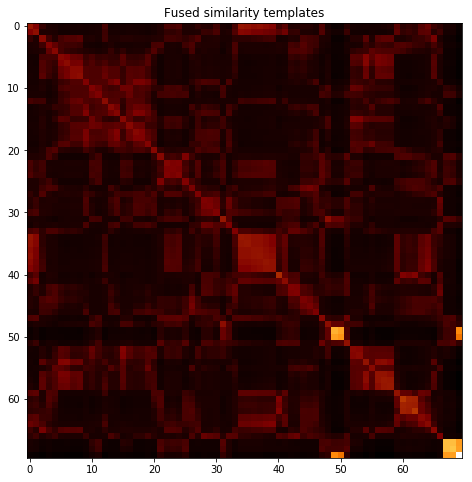

subject 02; gesture 1_1_2


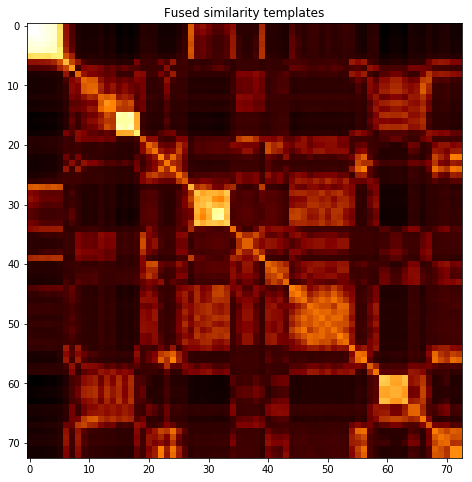

subject 02; gesture 1_1_1


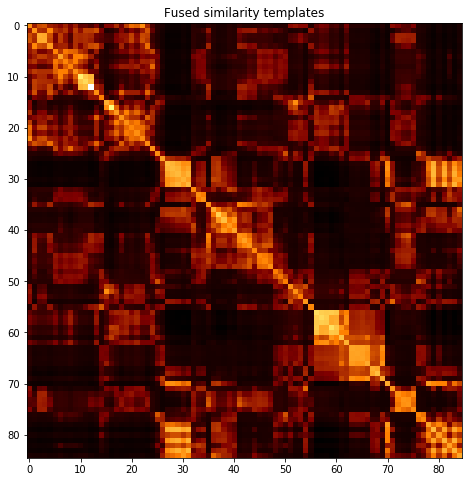

subject 02; gesture 1_0_1


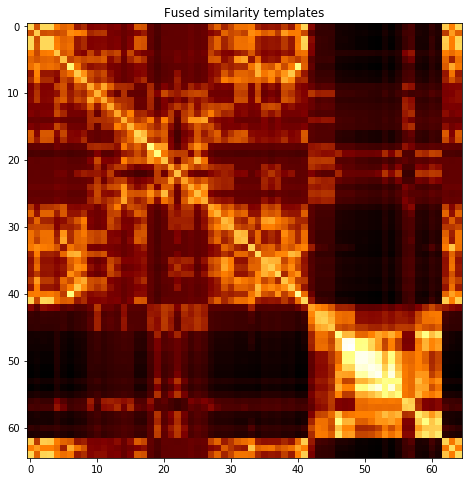

subject 02; gesture 1_0_2


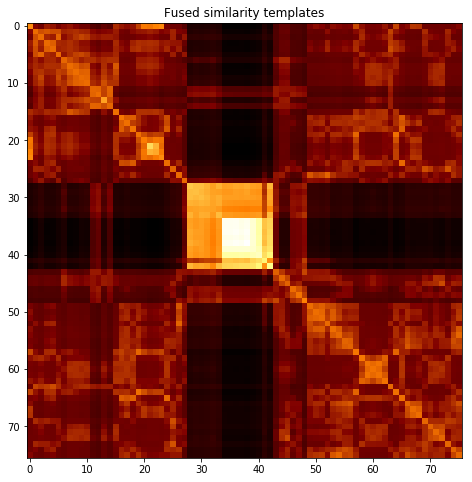

In [4]:
g1_dict_synerg = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_synerg[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_synerg[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.47716123722243886; sd 0.023812046222703383
subject 30; gesture 1_1_2; PoV: 0.8702581941745119


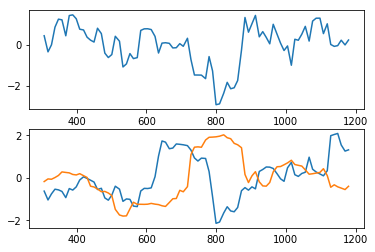

subject 30; gesture 1_1_1; avg 0.46832176551226873; sd 0.026766085523850045
subject 30; gesture 1_1_1; PoV: 0.8605919157631947


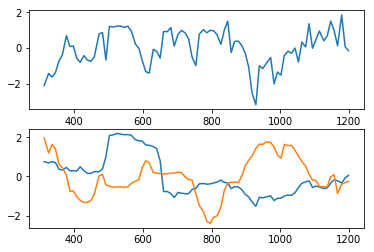

subject 30; gesture 1_0_1; avg 0.4313285946109985; sd 0.017750372571617986
subject 30; gesture 1_0_1; PoV: 0.8799835471576651


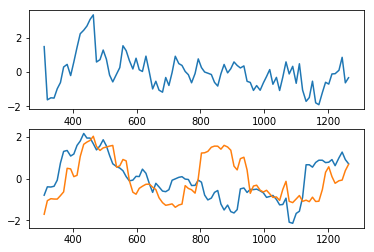

subject 30; gesture 1_0_2; avg 0.5346763765615381; sd 0.070621734628179
subject 30; gesture 1_0_2; PoV: 0.8078626066106396


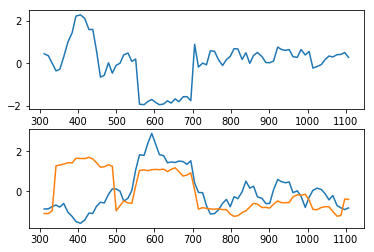

subject 06; gesture 1_1_2; avg 1.0936319998953363; sd 0.08396325115150095
subject 06; gesture 1_1_2; PoV: 0.830228126669307


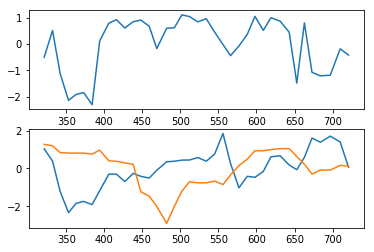

subject 06; gesture 1_1_1; avg 0.5464960626239158; sd 0.02767609498447164
subject 06; gesture 1_1_1; PoV: 0.8690799869341256


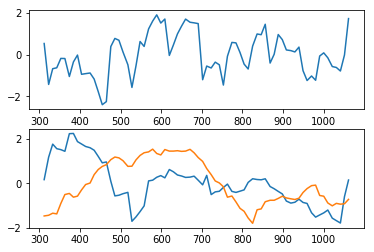

subject 06; gesture 1_0_1; avg 0.600254047063642; sd 0.029547762250460116
subject 06; gesture 1_0_1; PoV: 0.8708457535046381


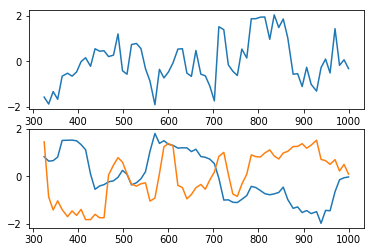

subject 06; gesture 1_0_2; avg 0.754685843182597; sd 0.040658119089235105
subject 06; gesture 1_0_2; PoV: 0.8571321769167977


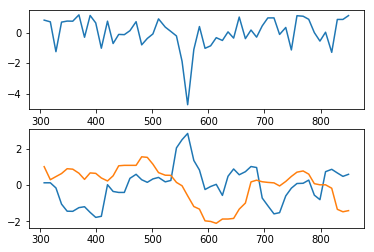

subject 09; gesture 1_1_2; avg 0.5573921758041888; sd 0.02680189872548112
subject 09; gesture 1_1_2; PoV: 0.8662210622049314


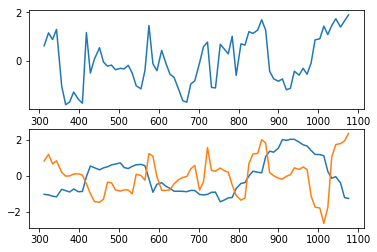

subject 09; gesture 1_1_1; avg 0.6352242673081959; sd 0.12456282425409035
subject 09; gesture 1_1_1; PoV: 0.756759219559376


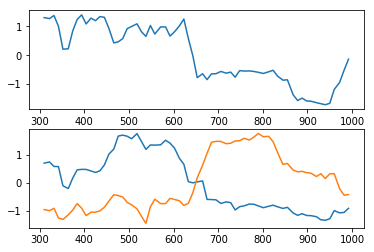

subject 09; gesture 1_0_1; avg 0.4753843700168458; sd 0.0457321470089707
subject 09; gesture 1_0_1; PoV: 0.8381040260423502


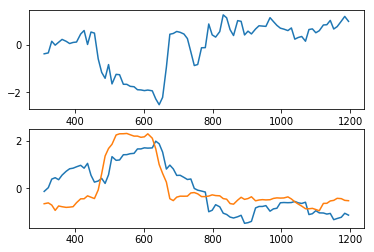

subject 09; gesture 1_0_2; avg 0.5810537075862946; sd 0.02568444303805476
subject 09; gesture 1_0_2; PoV: 0.8792153397696976


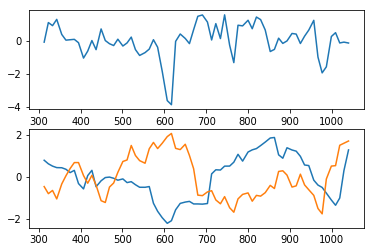

subject 03; gesture 1_1_2; avg 0.5306701345734021; sd 0.02930134854877122
subject 03; gesture 1_1_2; PoV: 0.8578055694289958


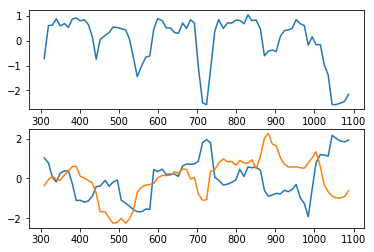

subject 03; gesture 1_1_1; avg 0.7511999998652541; sd 0.045425188210119656
subject 03; gesture 1_1_1; PoV: 0.8588771244292094


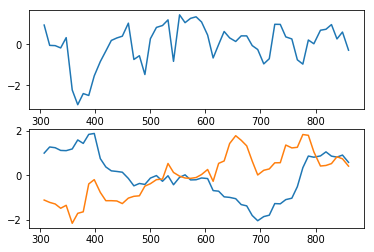

subject 03; gesture 1_0_1; avg 0.5734094756550157; sd 0.032679722149477036
subject 03; gesture 1_0_1; PoV: 0.8599486678432924


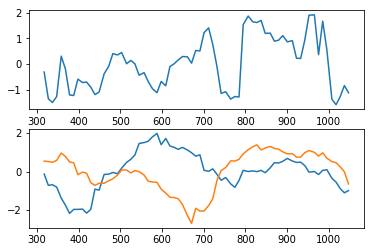

subject 03; gesture 1_0_2; avg 0.6538456965216239; sd 0.030706048971020364
subject 03; gesture 1_0_2; PoV: 0.8713592463929002


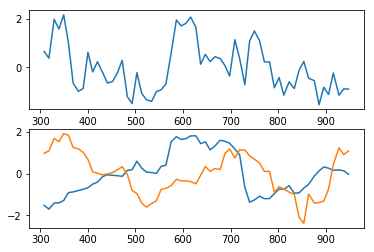

subject 05; gesture 1_1_2; avg 0.7382418067206991; sd 0.040474880011128776
subject 05; gesture 1_1_2; PoV: 0.8646650308889288


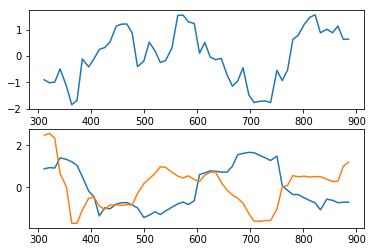

subject 05; gesture 1_1_1; avg 0.7289892855088665; sd 0.04326541626894596
subject 05; gesture 1_1_1; PoV: 0.8588358904156156


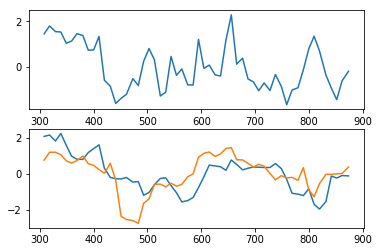

subject 05; gesture 1_0_1; avg 0.46445957835105567; sd 0.02088048053843387
subject 05; gesture 1_0_1; PoV: 0.8725585741395767


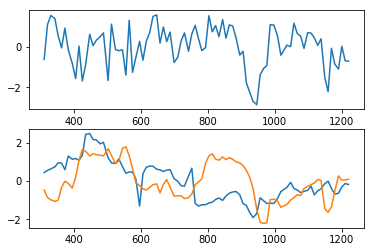

subject 05; gesture 1_0_2; avg 0.5974174446995247; sd 0.025450444603254
subject 05; gesture 1_0_2; PoV: 0.875628585644102


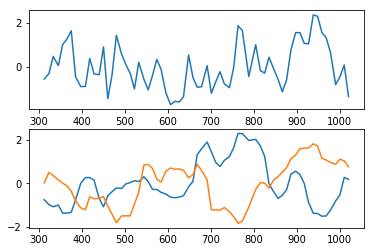

subject 21; gesture 1_1_2; avg 0.5573784164039192; sd 0.02425888368476173
subject 21; gesture 1_1_2; PoV: 0.8749514154400547


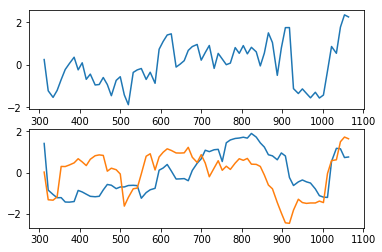

subject 21; gesture 1_1_1; avg 0.6725515060084375; sd 0.21913731207072235
subject 21; gesture 1_1_1; PoV: 0.6964107617019211


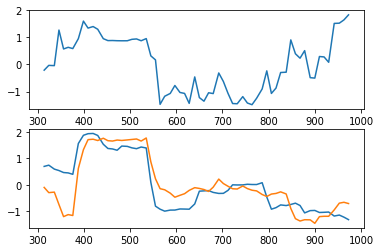

subject 21; gesture 1_0_1; avg 0.6784386031048701; sd 0.03014970642138758
subject 21; gesture 1_0_1; PoV: 0.8784282110858547


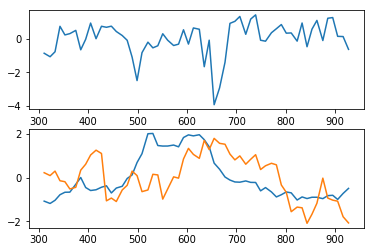

subject 21; gesture 1_0_2; avg 0.7060427962678525; sd 0.03699651793004986
subject 21; gesture 1_0_2; PoV: 0.8631132278527679


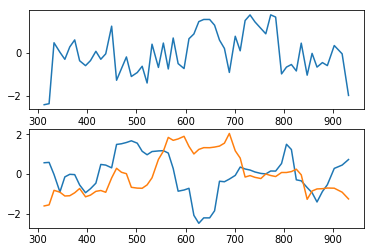

subject 17; gesture 1_1_2; avg 0.5544897596517051; sd 0.02378811584605243
subject 17; gesture 1_1_2; PoV: 0.8843707769245982


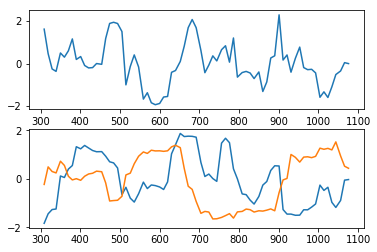

subject 17; gesture 1_1_1; avg 0.6507552467254103; sd 0.02944734449581653
subject 17; gesture 1_1_1; PoV: 0.8710297116026399


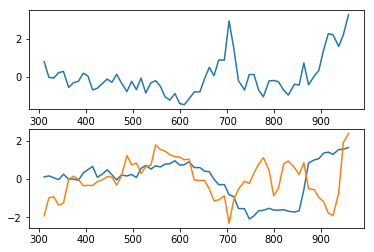

subject 17; gesture 1_0_1; avg 0.5703884889575057; sd 0.025653208230252987
subject 17; gesture 1_0_1; PoV: 0.8691462316935601


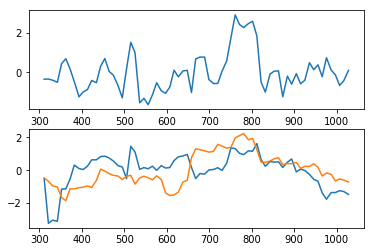

subject 17; gesture 1_0_2; avg 0.6580831200775533; sd 0.029638053296177386
subject 17; gesture 1_0_2; PoV: 0.8769225508096796


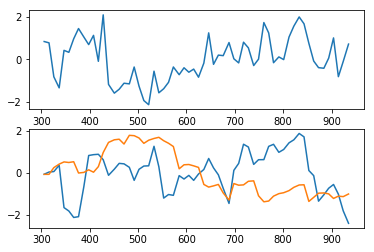

subject 01; gesture 1_1_2; avg 0.6208418621817821; sd 0.04051099206363616
subject 01; gesture 1_1_2; PoV: 0.8536862967911222


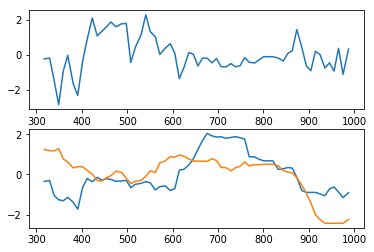

subject 01; gesture 1_1_1; avg 0.5871961282017524; sd 0.02562581731854268
subject 01; gesture 1_1_1; PoV: 0.8671189626969487


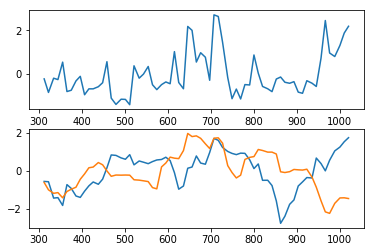

subject 01; gesture 1_0_1; avg 0.4389946346533654; sd 0.017874507023968554
subject 01; gesture 1_0_1; PoV: 0.8802766440384995


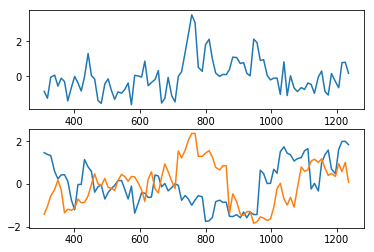

subject 01; gesture 1_0_2; avg 0.4903501694850983; sd 0.021359223673025295
subject 01; gesture 1_0_2; PoV: 0.8710512892631023


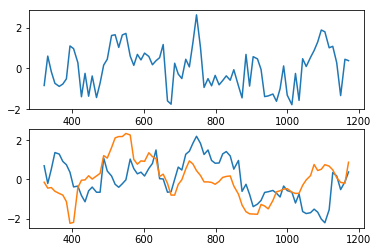

subject 16; gesture 1_1_2; avg 0.7714198423664499; sd 0.03514550146390555
subject 16; gesture 1_1_2; PoV: 0.8709515882516353


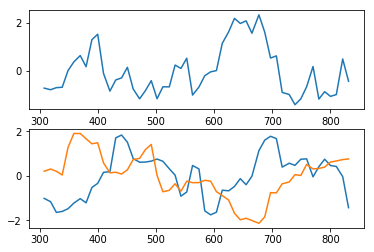

subject 16; gesture 1_1_1; avg 0.5539505864485142; sd 0.03131753725798447
subject 16; gesture 1_1_1; PoV: 0.857608454308774


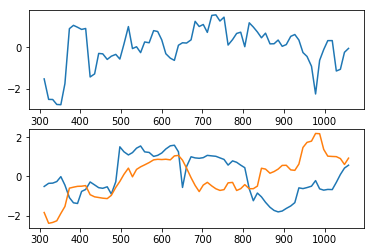

subject 16; gesture 1_0_1; avg 0.9093806114545294; sd 0.048758409567804716
subject 16; gesture 1_0_1; PoV: 0.8674796255796129


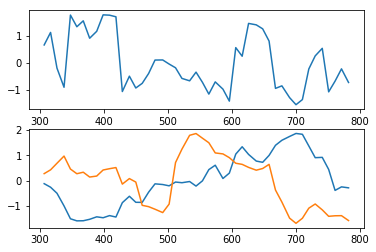

subject 16; gesture 1_0_2; avg 0.724112029058187; sd 0.03564964438436017
subject 16; gesture 1_0_2; PoV: 0.8694597019860596


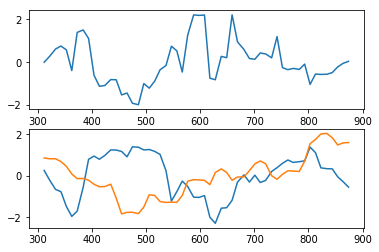

subject 26; gesture 1_1_2; avg 0.7245912248527329; sd 0.03148645088672005
subject 26; gesture 1_1_2; PoV: 0.8720459789057703


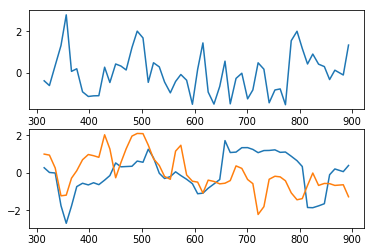

subject 26; gesture 1_1_1; avg 0.7286133670325007; sd 0.051572306122553015
subject 26; gesture 1_1_1; PoV: 0.8488813136670535


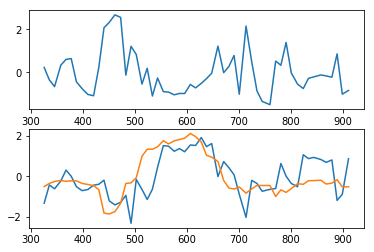

subject 26; gesture 1_0_1; avg 0.2014102896765076; sd 0.007961957052771964
subject 26; gesture 1_0_1; PoV: 0.8766358655036061


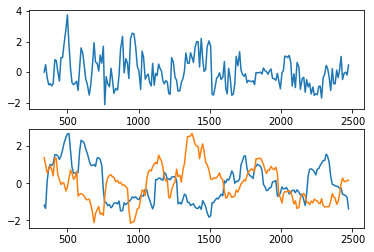

subject 26; gesture 1_0_2; avg 0.6056383006634398; sd 0.032114261342134985
subject 26; gesture 1_0_2; PoV: 0.8646952280463959


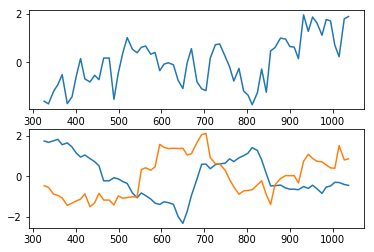

subject 32; gesture 1_1_2; avg 0.5145222309237873; sd 0.03036042303338799
subject 32; gesture 1_1_2; PoV: 0.8554311131860343


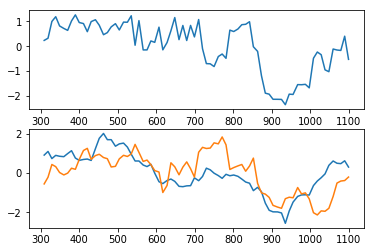

subject 32; gesture 1_1_1; avg 0.5996063759883242; sd 0.04644732159797171
subject 32; gesture 1_1_1; PoV: 0.8362011464290351


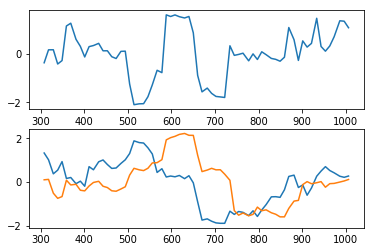

subject 32; gesture 1_0_1; avg 0.5809643153812538; sd 0.046096621765146624
subject 32; gesture 1_0_1; PoV: 0.8457392368258464


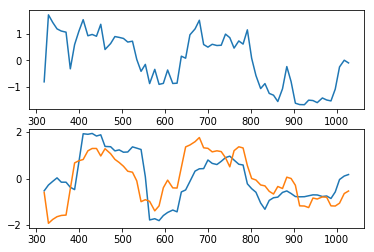

subject 32; gesture 1_0_2; avg 0.6935391821809535; sd 0.0395914748269407
subject 32; gesture 1_0_2; PoV: 0.8608418545170363


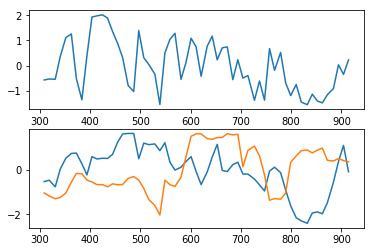

subject 04; gesture 1_1_2; avg 0.5722604079909239; sd 0.035292482443533654
subject 04; gesture 1_1_2; PoV: 0.8642480758756378


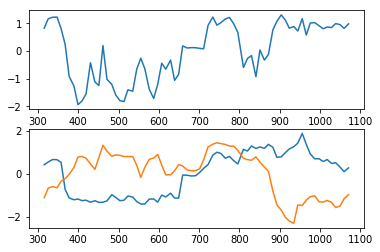

subject 04; gesture 1_1_1; avg 0.5850166578493108; sd 0.029206075679366283
subject 04; gesture 1_1_1; PoV: 0.8651893054000058


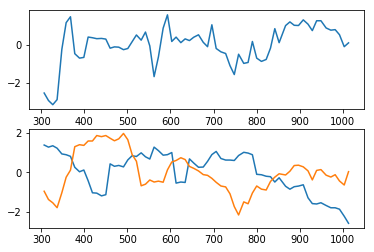

subject 04; gesture 1_0_1; avg 0.6862279879669831; sd 0.03305929889709181
subject 04; gesture 1_0_1; PoV: 0.8682868982837468


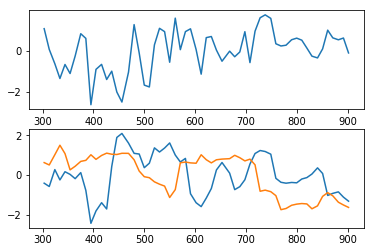

subject 04; gesture 1_0_2; avg 0.6398545921247416; sd 0.02960398538779837
subject 04; gesture 1_0_2; PoV: 0.8675547276011573


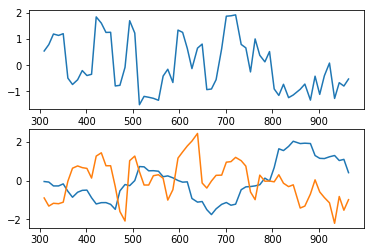

subject 08; gesture 1_1_2; avg 0.5437465423300961; sd 0.03238986415198928
subject 08; gesture 1_1_2; PoV: 0.8543527054165981


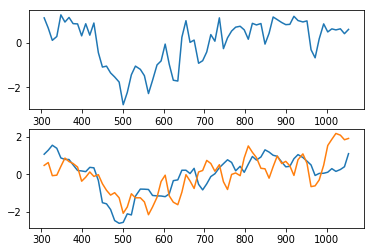

subject 08; gesture 1_1_1; avg 0.6534297590754541; sd 0.03653199156049338
subject 08; gesture 1_1_1; PoV: 0.8622231347065944


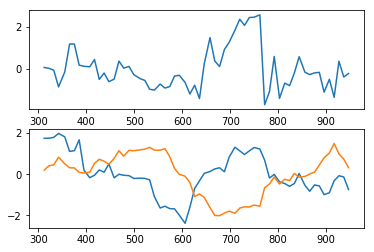

subject 08; gesture 1_0_1; avg 0.6086522638629236; sd 0.02407719153120185
subject 08; gesture 1_0_1; PoV: 0.8843222016937249


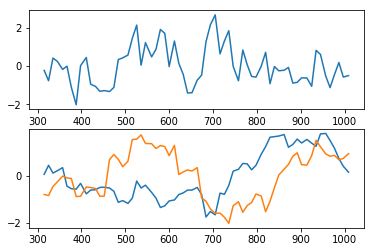

subject 08; gesture 1_0_2; avg 0.6517240937656197; sd 0.03302050643902729
subject 08; gesture 1_0_2; PoV: 0.8570187457396656


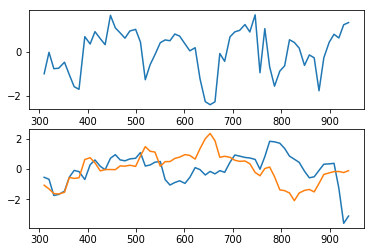

subject 27; gesture 1_1_2; avg 0.5942981430937297; sd 0.031476441467377464
subject 27; gesture 1_1_2; PoV: 0.8728058435728674


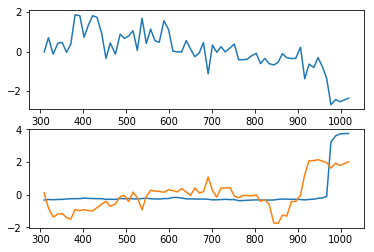

subject 27; gesture 1_1_1; avg 0.4219014750629239; sd 0.019922098488089558
subject 27; gesture 1_1_1; PoV: 0.8760178123320473


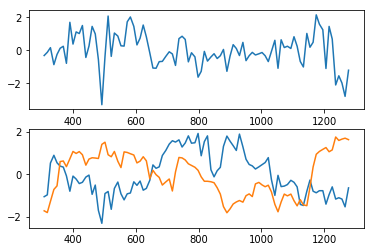

subject 27; gesture 1_0_1; avg 0.6435813498169523; sd 0.03713984947599639
subject 27; gesture 1_0_1; PoV: 0.8656725681130027


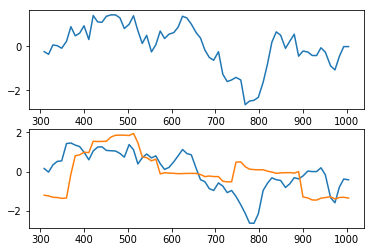

subject 27; gesture 1_0_2; avg 0.6225912046610037; sd 0.02699375732467717
subject 27; gesture 1_0_2; PoV: 0.8719154166357242


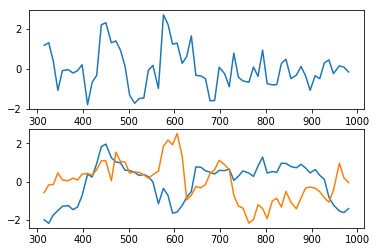

subject 14; gesture 1_1_2; avg 0.5347218840922706; sd 0.022410543078996537
subject 14; gesture 1_1_2; PoV: 0.8761399627510795


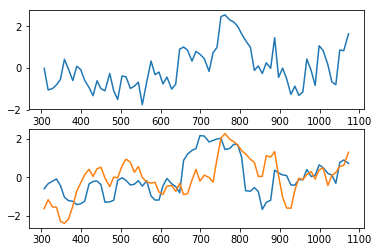

subject 14; gesture 1_1_1; avg 0.7876172681599141; sd 0.03898319842945612
subject 14; gesture 1_1_1; PoV: 0.8730519571844119


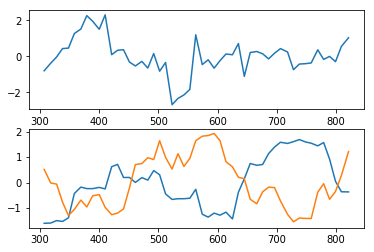

subject 14; gesture 1_0_1; avg 0.5113784061417328; sd 0.05419369100845455
subject 14; gesture 1_0_1; PoV: 0.8220210063661411


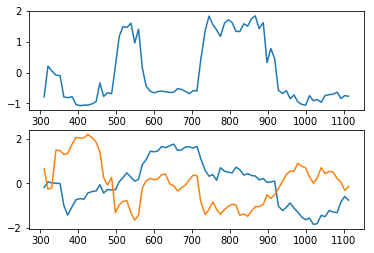

subject 14; gesture 1_0_2; avg 0.5980132933079353; sd 0.040937128192574376
subject 14; gesture 1_0_2; PoV: 0.8582553075732178


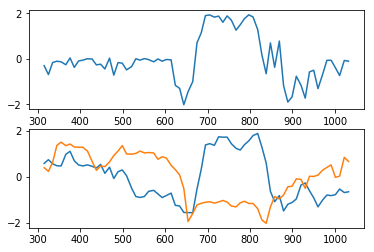

subject 23; gesture 1_1_2; avg 0.5216460800667272; sd 0.024491657865511485
subject 23; gesture 1_1_2; PoV: 0.8688766950655288


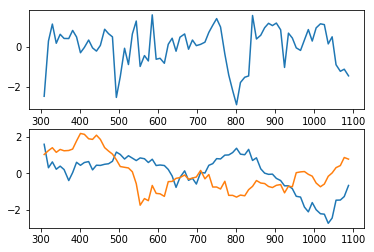

subject 23; gesture 1_1_1; avg 0.4786329085296555; sd 0.02746721452822996
subject 23; gesture 1_1_1; PoV: 0.8598412346855604


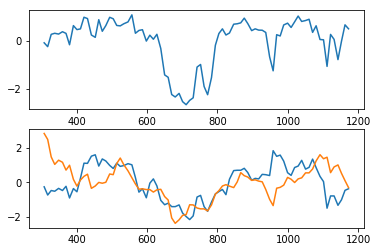

subject 23; gesture 1_0_1; avg 0.48175754532770537; sd 0.020820244428881172
subject 23; gesture 1_0_1; PoV: 0.8737907372639415


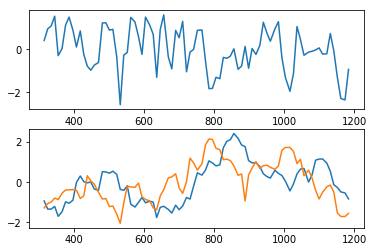

subject 23; gesture 1_0_2; avg 0.5789685457155228; sd 0.02800471359707998
subject 23; gesture 1_0_2; PoV: 0.8724904837311012


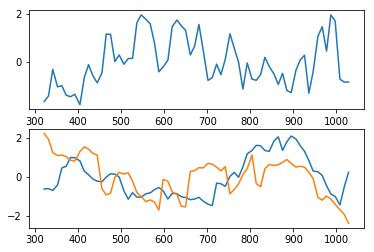

subject 25; gesture 1_1_2; avg 0.6478768782659139; sd 0.03014645099195365
subject 25; gesture 1_1_2; PoV: 0.8747967860023135


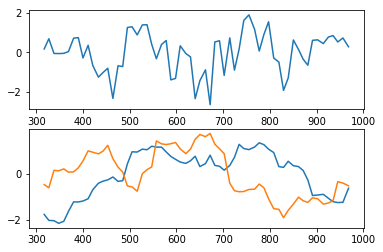

subject 25; gesture 1_1_1; avg 0.4908074129368294; sd 0.020406823938746904
subject 25; gesture 1_1_1; PoV: 0.8734422195902094


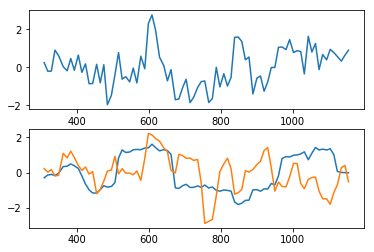

subject 25; gesture 1_0_1; avg 0.6057257993927884; sd 0.03207712244096921
subject 25; gesture 1_0_1; PoV: 0.8634177628239804


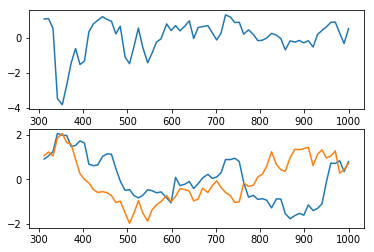

subject 25; gesture 1_0_2; avg 0.683644911927872; sd 0.049256036852492836
subject 25; gesture 1_0_2; PoV: 0.8534597564942449


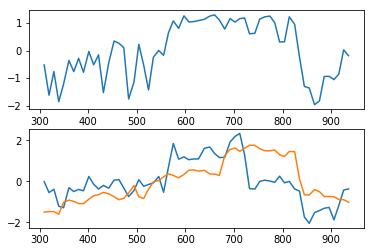

subject 18; gesture 1_1_2; avg 0.501763772117665; sd 0.02211690728372225
subject 18; gesture 1_1_2; PoV: 0.872499831274667


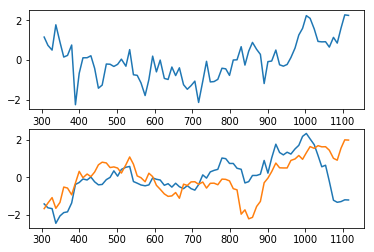

subject 18; gesture 1_1_1; avg 0.5244740317351916; sd 0.02928445403014774
subject 18; gesture 1_1_1; PoV: 0.8596126485766932


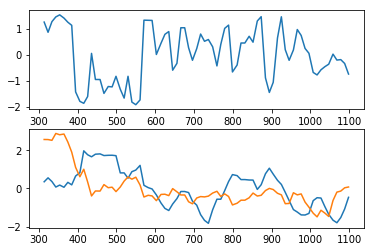

subject 18; gesture 1_0_1; avg 0.8070062196297111; sd 0.14885449971385217
subject 18; gesture 1_0_1; PoV: 0.7628123334592488


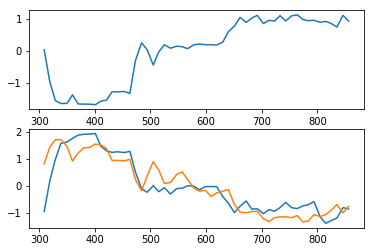

subject 18; gesture 1_0_2; avg 0.5001380698090906; sd 0.019974110571846275
subject 18; gesture 1_0_2; PoV: 0.8799082069864472


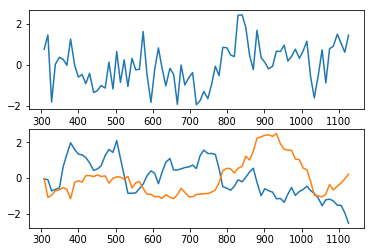

subject 29; gesture 1_1_2; avg 0.6274857245211274; sd 0.03287571843010887
subject 29; gesture 1_1_2; PoV: 0.8714393892749163


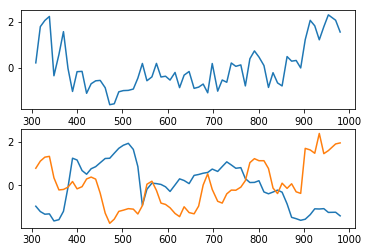

subject 29; gesture 1_1_1; avg 0.7183626246112891; sd 0.08559786695813196
subject 29; gesture 1_1_1; PoV: 0.8090865076761395


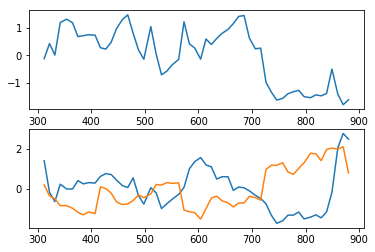

subject 29; gesture 1_0_1; avg 0.6037153060595715; sd 0.027625960117707102
subject 29; gesture 1_0_1; PoV: 0.8702094086445746


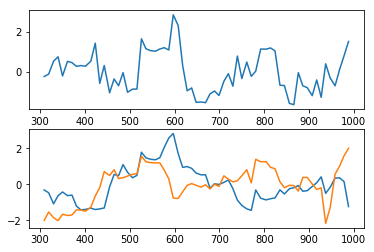

subject 29; gesture 1_0_2; avg 0.588555929659611; sd 0.03109717556550828
subject 29; gesture 1_0_2; PoV: 0.8578841935637647


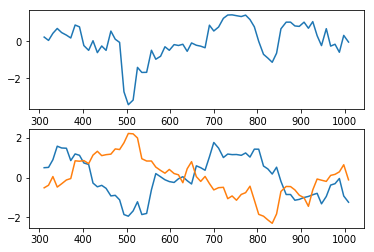

subject 15; gesture 1_1_2; avg 0.4969508926151522; sd 0.021744264703440923
subject 15; gesture 1_1_2; PoV: 0.8750725865746609


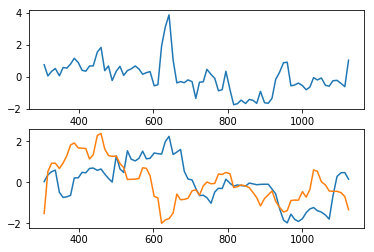

subject 15; gesture 1_1_1; avg 0.6453993562836496; sd 0.028459605151985343
subject 15; gesture 1_1_1; PoV: 0.8742629463777782


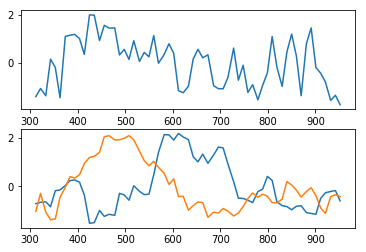

subject 15; gesture 1_0_1; avg 0.7038942115254518; sd 0.04493658469164514
subject 15; gesture 1_0_1; PoV: 0.8616024488043779


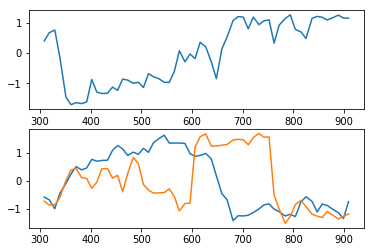

subject 15; gesture 1_0_2; avg 0.6316845403693222; sd 0.03498283031224297
subject 15; gesture 1_0_2; PoV: 0.8627780079644561


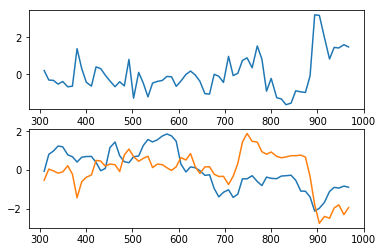

subject 28; gesture 1_1_2; avg 0.8412708655801502; sd 0.04509536968700934
subject 28; gesture 1_1_2; PoV: 0.8536081514868017


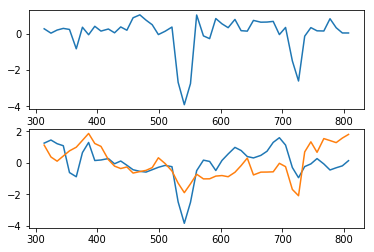

subject 28; gesture 1_1_1; avg 1.0311793955417632; sd 0.06172901429410015
subject 28; gesture 1_1_1; PoV: 0.8611073017464465


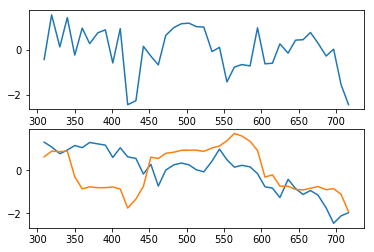

subject 28; gesture 1_0_1; avg 0.7652539743843794; sd 0.03412179696882547
subject 28; gesture 1_0_1; PoV: 0.8745178587152409


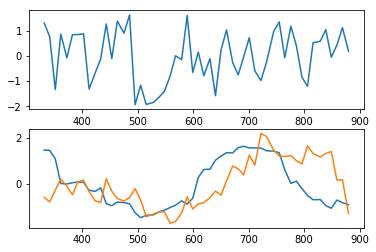

subject 28; gesture 1_0_2; avg 0.676539150193902; sd 0.046431540043696554
subject 28; gesture 1_0_2; PoV: 0.8498750507050117


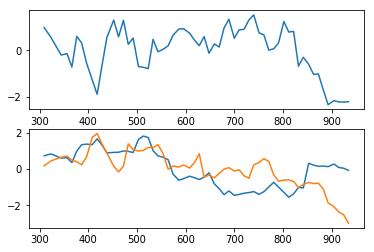

subject 12; gesture 1_1_2; avg 0.53940198755874; sd 0.026334259726717164
subject 12; gesture 1_1_2; PoV: 0.8661437715898663


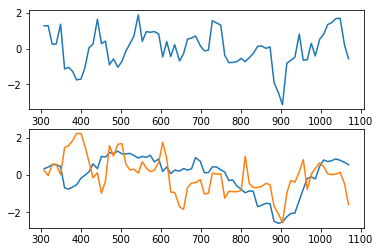

subject 12; gesture 1_1_1; avg 0.5585570962160247; sd 0.02562647209290221
subject 12; gesture 1_1_1; PoV: 0.8719974162396636


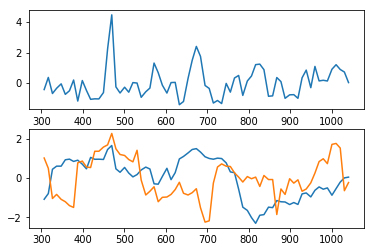

subject 12; gesture 1_0_1; avg 0.5425085637733461; sd 0.02338565982641192
subject 12; gesture 1_0_1; PoV: 0.8708847604718765


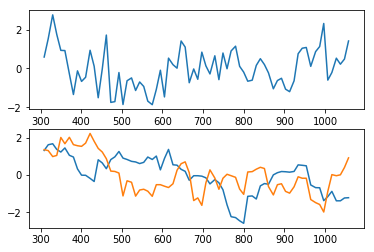

subject 12; gesture 1_0_2; avg 0.6378016881947097; sd 0.11024957425237238
subject 12; gesture 1_0_2; PoV: 0.7697764090834462


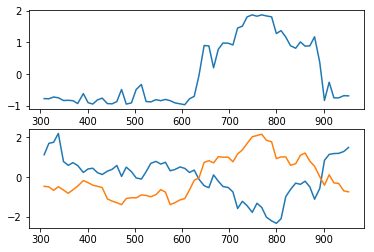

subject 19; gesture 1_1_2; avg 0.5235825579222833; sd 0.026640480717702242
subject 19; gesture 1_1_2; PoV: 0.8659517298031736


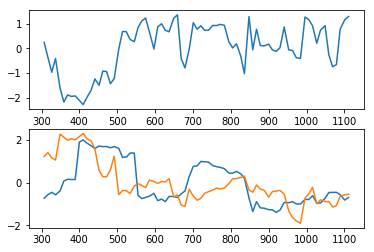

subject 19; gesture 1_1_1; avg 0.6824517946970787; sd 0.032501473161622246
subject 19; gesture 1_1_1; PoV: 0.8755396866641734


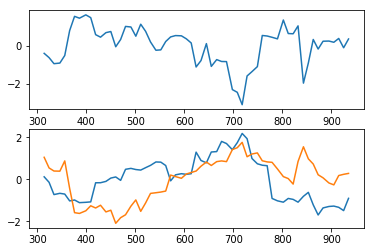

subject 19; gesture 1_0_1; avg 0.7843658121766194; sd 0.08303276791502082
subject 19; gesture 1_0_1; PoV: 0.8118190517462754


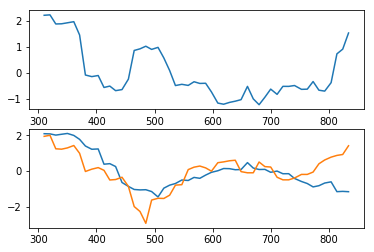

subject 19; gesture 1_0_2; avg 0.6429222978766593; sd 0.028619273549833915
subject 19; gesture 1_0_2; PoV: 0.8721271188959191


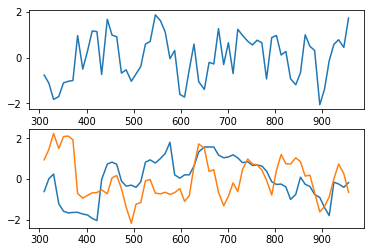

subject 07; gesture 1_1_2; avg 0.4885157553923859; sd 0.01947401960953954
subject 07; gesture 1_1_2; PoV: 0.8811737761344425


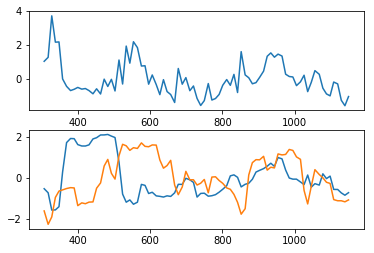

subject 07; gesture 1_1_1; avg 0.5827730534001404; sd 0.03172052275571081
subject 07; gesture 1_1_1; PoV: 0.8600861243506016


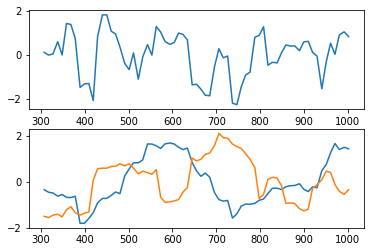

subject 07; gesture 1_0_1; avg 0.4390781944449166; sd 0.0183734547288355
subject 07; gesture 1_0_1; PoV: 0.8783418522339698


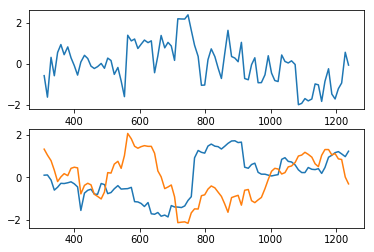

subject 07; gesture 1_0_2; avg 0.5521410501789125; sd 0.024525057952234065
subject 07; gesture 1_0_2; PoV: 0.8774125413843059


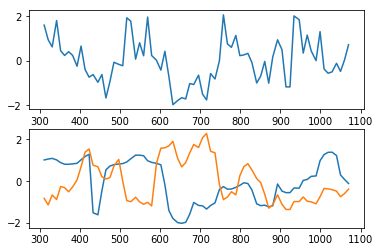

subject 20; gesture 1_1_2; avg 0.5399140024072043; sd 0.021541196672965494
subject 20; gesture 1_1_2; PoV: 0.8799695455112612


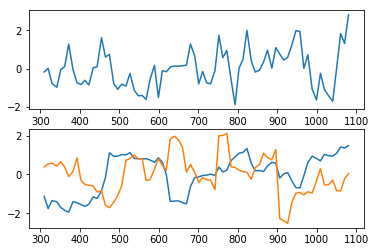

subject 20; gesture 1_1_1; avg 0.5051944615355909; sd 0.02171671102943824
subject 20; gesture 1_1_1; PoV: 0.8782953282898696


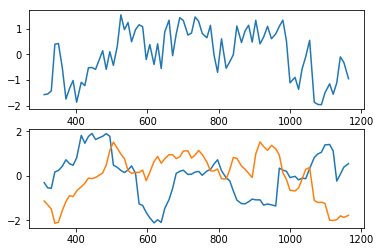

subject 20; gesture 1_0_1; avg 0.5121735654674789; sd 0.02417391101651924
subject 20; gesture 1_0_1; PoV: 0.8666700790660341


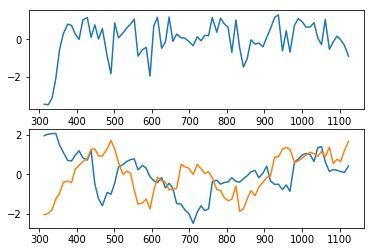

subject 20; gesture 1_0_2; avg 0.3904045923026205; sd 0.01634942664072756
subject 20; gesture 1_0_2; PoV: 0.8741157214101994


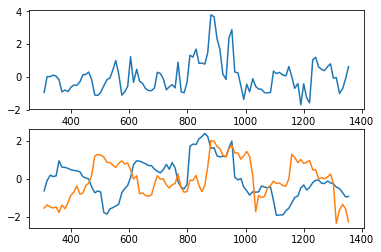

subject 31; gesture 1_1_2; avg 0.6559390523673253; sd 0.030571923770977307
subject 31; gesture 1_1_2; PoV: 0.870480154434143


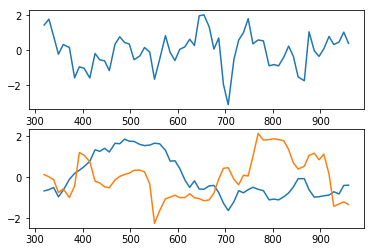

subject 31; gesture 1_1_1; avg 0.6231629016306257; sd 0.04100409203365005
subject 31; gesture 1_1_1; PoV: 0.855870755415272


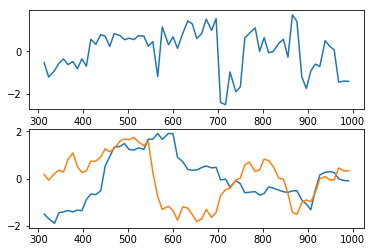

subject 31; gesture 1_0_1; avg 0.4228532183346263; sd 0.01840772135264749
subject 31; gesture 1_0_1; PoV: 0.8762783130564427


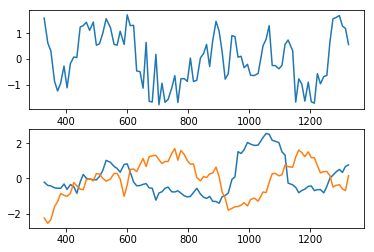

subject 31; gesture 1_0_2; avg 0.6273293899465475; sd 0.03309894976749074
subject 31; gesture 1_0_2; PoV: 0.8681270479375942


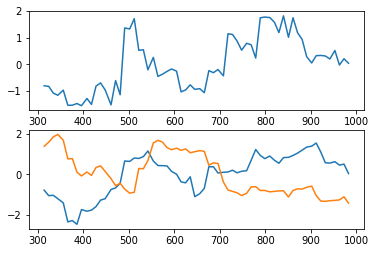

subject 13; gesture 1_1_2; avg 0.44844318080250495; sd 0.020956594049590258
subject 13; gesture 1_1_2; PoV: 0.8722272879191642


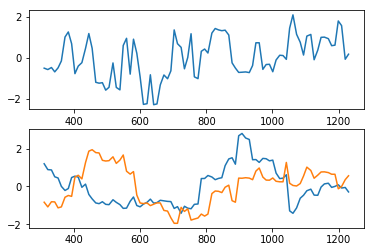

subject 13; gesture 1_1_1; avg 0.5212828830813744; sd 0.03434348313949581
subject 13; gesture 1_1_1; PoV: 0.8515009634017496


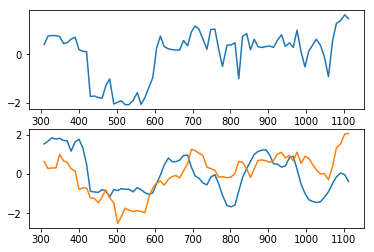

subject 13; gesture 1_0_1; avg 0.22243705938224953; sd 0.009450997441746123
subject 13; gesture 1_0_1; PoV: 0.8690915541426016


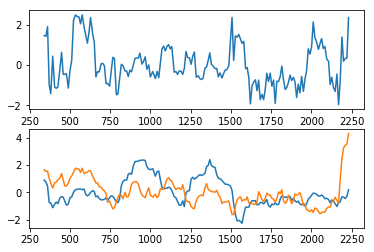

subject 13; gesture 1_0_2; avg 0.3929471982022361; sd 0.016247646046827605
subject 13; gesture 1_0_2; PoV: 0.8790754726617909


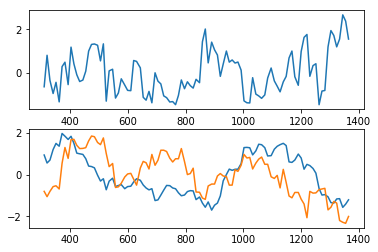

subject 36; gesture 1_1_2; avg 0.6193936034633591; sd 0.03362333061333355
subject 36; gesture 1_1_2; PoV: 0.8717312076768405


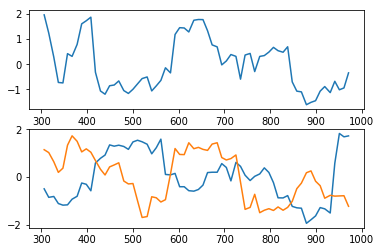

subject 36; gesture 1_1_1; avg 0.5404104807144784; sd 0.02070921706220631
subject 36; gesture 1_1_1; PoV: 0.8827569641299801


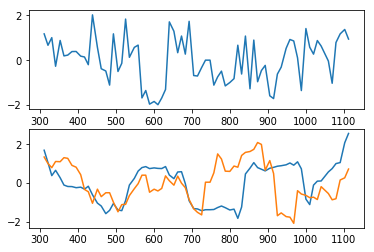

subject 36; gesture 1_0_1; avg 0.6706018964688178; sd 0.03112913815107719
subject 36; gesture 1_0_1; PoV: 0.8702138947066196


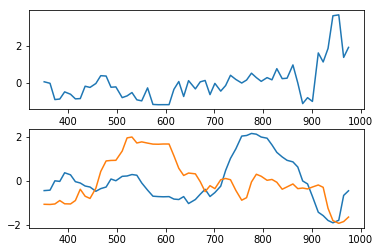

subject 36; gesture 1_0_2; avg 0.6899543174889364; sd 0.0356215252836167
subject 36; gesture 1_0_2; PoV: 0.8695689431621026


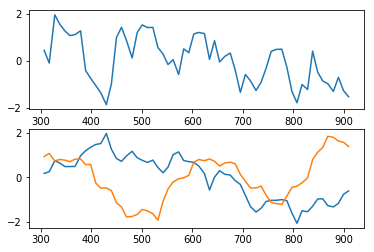

subject 24; gesture 1_1_2; avg 0.5651624730600334; sd 0.02418509791376397
subject 24; gesture 1_1_2; PoV: 0.873420982189114


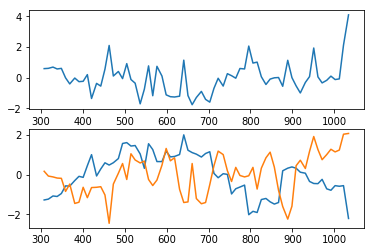

subject 24; gesture 1_1_1; avg 0.6442187444510175; sd 0.03420757081703122
subject 24; gesture 1_1_1; PoV: 0.8619202670014187


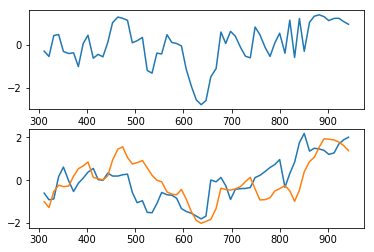

subject 24; gesture 1_0_1; avg 0.5284058977509187; sd 0.024833689161906303
subject 24; gesture 1_0_1; PoV: 0.8714126503598919


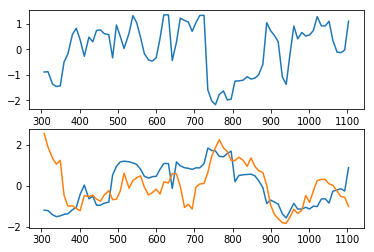

subject 24; gesture 1_0_2; avg 0.5586167526276743; sd 0.028237592382597865
subject 24; gesture 1_0_2; PoV: 0.8650936906534028


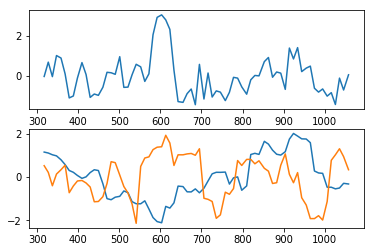

subject 33; gesture 1_1_2; avg 0.552867027946483; sd 0.07024035035443651
subject 33; gesture 1_1_2; PoV: 0.8096073342640792


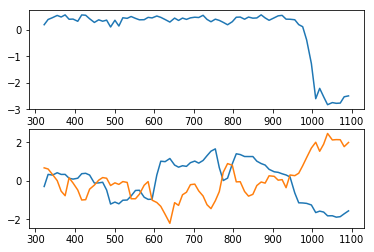

subject 33; gesture 1_1_1; avg 0.528881873127079; sd 0.02143450840284008
subject 33; gesture 1_1_1; PoV: 0.8806560062600154


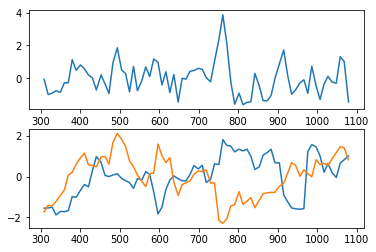

subject 33; gesture 1_0_1; avg 0.5804116114596239; sd 0.03193772140660624
subject 33; gesture 1_0_1; PoV: 0.8594678787545724


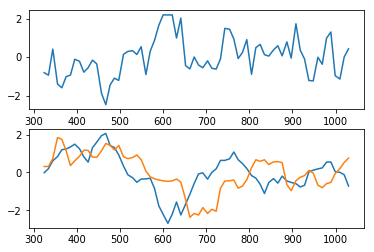

subject 33; gesture 1_0_2; avg 0.5345034396828172; sd 0.028429849938882458
subject 33; gesture 1_0_2; PoV: 0.8651640665954413


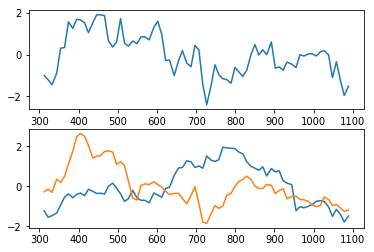

subject 11; gesture 1_1_2; avg 0.5075798069223758; sd 0.024175846554970123
subject 11; gesture 1_1_2; PoV: 0.8692500387399522


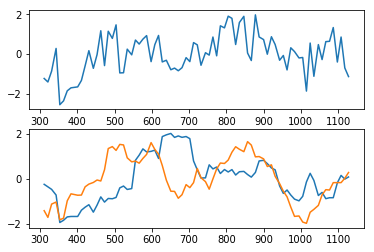

subject 11; gesture 1_1_1; avg 0.4597407590231726; sd 0.02616627049508175
subject 11; gesture 1_1_1; PoV: 0.8580134517528358


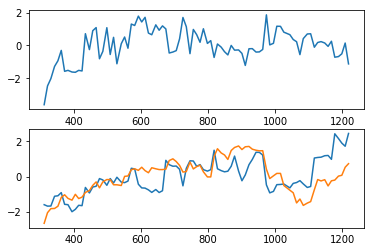

subject 11; gesture 1_0_1; avg 0.4801154515790194; sd 0.019686328828156727
subject 11; gesture 1_0_1; PoV: 0.8761780830379269


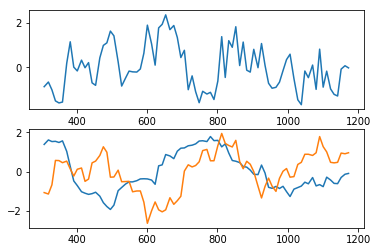

subject 11; gesture 1_0_2; avg 0.5646549981172835; sd 0.026665208930449755
subject 11; gesture 1_0_2; PoV: 0.8711139708549507


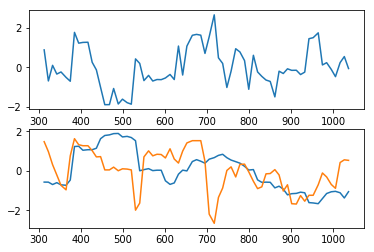

subject 35; gesture 1_1_2; avg 0.5509315407103695; sd 0.026769735501793176
subject 35; gesture 1_1_2; PoV: 0.8652746127975758


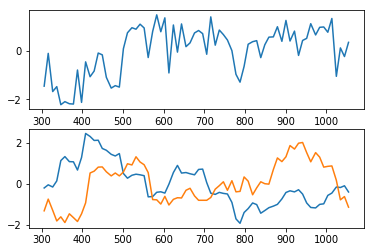

subject 35; gesture 1_1_1; avg 0.7146025300345551; sd 0.031821887136951596
subject 35; gesture 1_1_1; PoV: 0.8677074242002629


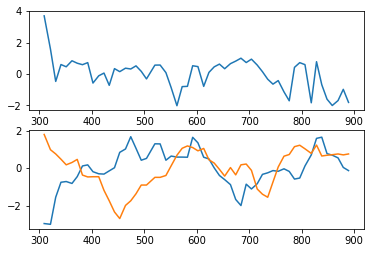

subject 35; gesture 1_0_1; avg 0.5929084816696478; sd 0.0280897008959604
subject 35; gesture 1_0_1; PoV: 0.867741509700967


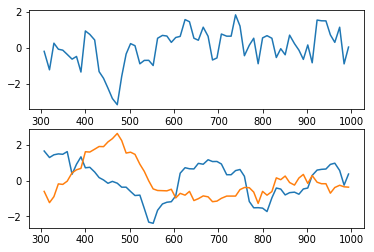

subject 35; gesture 1_0_2; avg 0.5087772788497004; sd 0.02720041746451948
subject 35; gesture 1_0_2; PoV: 0.8601347260864622


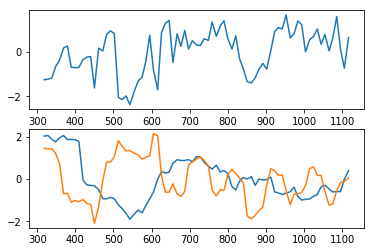

subject 22; gesture 1_1_2; avg 0.7633171903271535; sd 0.04258927859374256
subject 22; gesture 1_1_2; PoV: 0.8461257608474565


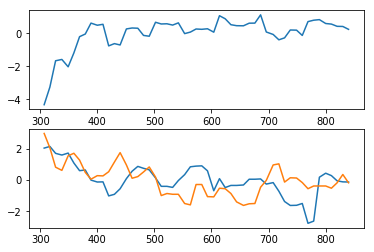

subject 22; gesture 1_1_1; avg 0.6265980156188257; sd 0.032478630901489614
subject 22; gesture 1_1_1; PoV: 0.8687904939928607


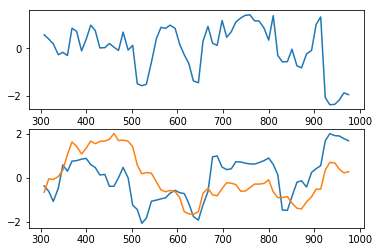

subject 22; gesture 1_0_1; avg 0.7010777989386276; sd 0.04689382229269513
subject 22; gesture 1_0_1; PoV: 0.8442108953427068


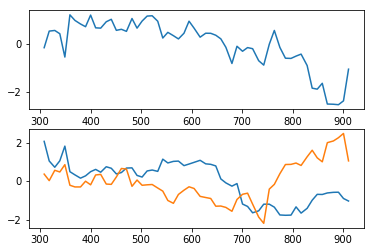

subject 22; gesture 1_0_2; avg 0.5730020818280311; sd 0.022972946038083353
subject 22; gesture 1_0_2; PoV: 0.8837535022735381


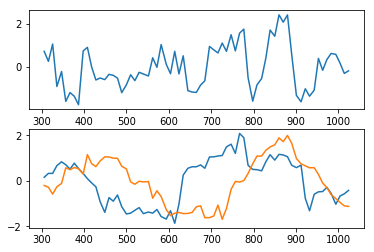

subject 34; gesture 1_1_2; avg 0.6589346002775873; sd 0.06567269473420413
subject 34; gesture 1_1_2; PoV: 0.8387457235720172


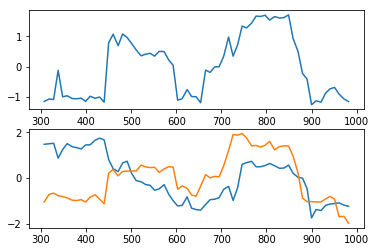

subject 34; gesture 1_1_1; avg 0.4278322135578133; sd 0.02203281761943345
subject 34; gesture 1_1_1; PoV: 0.865800751181108


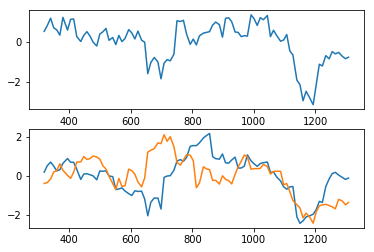

subject 34; gesture 1_0_1; avg 0.5082661900561832; sd 0.04215477881308263
subject 34; gesture 1_0_1; PoV: 0.8445772486545166


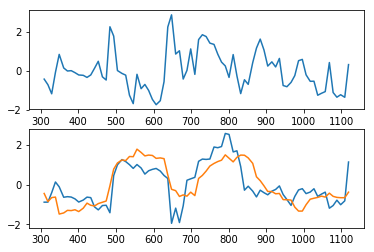

subject 34; gesture 1_0_2; avg 0.5230348285571553; sd 0.02696577594552267
subject 34; gesture 1_0_2; PoV: 0.8652611174878163


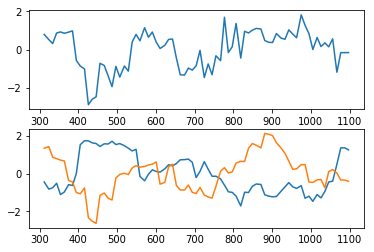

subject 10; gesture 1_1_2; avg 0.6417471020950729; sd 0.4222989333955387
subject 10; gesture 1_1_2; PoV: 0.5650814480500783


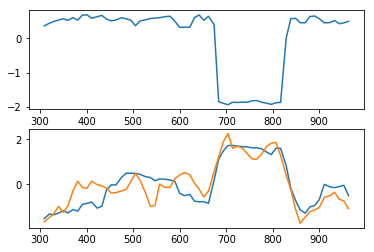

subject 10; gesture 1_1_1; avg 0.5445868083364717; sd 0.026753074519303192
subject 10; gesture 1_1_1; PoV: 0.8751114463354631


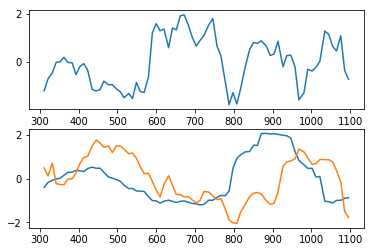

subject 10; gesture 1_0_1; avg 0.3462373323752175; sd 0.01357220905307416
subject 10; gesture 1_0_1; PoV: 0.8812934749784906


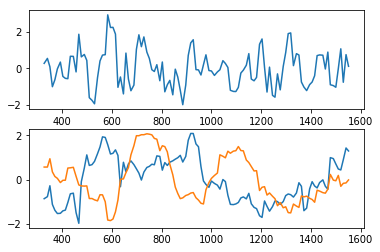

subject 10; gesture 1_0_2; avg 0.5872083282358085; sd 0.028140418286700716
subject 10; gesture 1_0_2; PoV: 0.8667214650210999


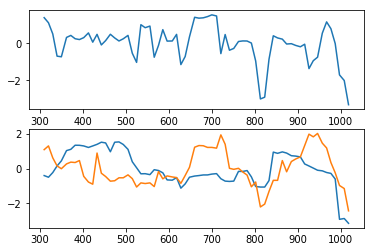

subject 02; gesture 1_1_2; avg 0.5735314046724683; sd 0.03405003552827385
subject 02; gesture 1_1_2; PoV: 0.8504036232412362


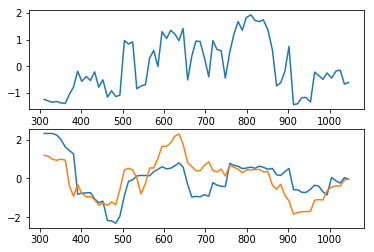

subject 02; gesture 1_1_1; avg 0.47763560787611986; sd 0.02117684436309495
subject 02; gesture 1_1_1; PoV: 0.8791692016903562


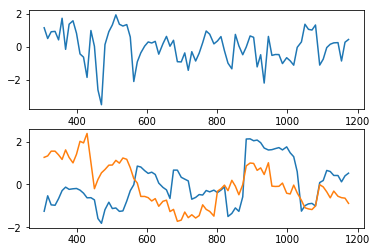

subject 02; gesture 1_0_1; avg 0.6194569501065582; sd 0.04232051531064232
subject 02; gesture 1_0_1; PoV: 0.8534302511981374


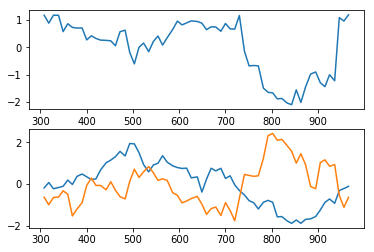

subject 02; gesture 1_0_2; avg 0.5368930924878738; sd 0.04274851243281884
subject 02; gesture 1_0_2; PoV: 0.8479872074799819


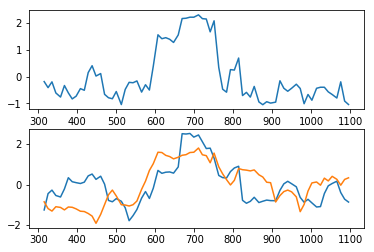

In [5]:
decomp_g1_syn = {}

for s, gdict in g1_dict_synerg.items():
    decomp_g1_syn[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_syn[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26
gesture 1_1_2

gesture 1_0_1

32
gesture 1_1_1

08
gesture 1_1_2

gesture 1_0_1

27
gesture 1_1_1

gesture 1_0_2

23
gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25
gesture 1_0_1


18
gesture 1_1_2

gesture 1_1_1

29
gesture 1_1_1

gesture 1_0_1

15
gesture 1_1_1


12
gesture 1_1_2

gesture 1_0_1

19
gesture 1_1_1

07
gesture 1_1_2
gesture 1_0_1
gesture 1_0_2

20
gesture 1_0_1

31
gesture 1_1_2
gesture 1_0_1

13
gesture 1_1_2
gesture 1_1_1
gesture 1_0_1

36
gesture 1_1_2

24
gesture 1_1_1
gesture 1_0_1

33
gesture 1_0_1

11
gesture 1_1_2
gesture 1_1_1
gesture 1_0_1
gesture 1_0_2

35
gesture 1_0_2

22
gesture 1_0_1
gesture 1_0_2

34
gesture 1_0_1
gesture 1_0_2

10
gesture 1_1_2
gesture 1_0_1

---

In [6]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_syn.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_syn.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [7]:
np.average([d for d in compares["30"].values()])

6.369169356560107